# Sales Forecasting and Demand Prediction

## 1. Dataset Description and Project Overview
This dataset contains daily records of retail stores, including sales, inventory, pricing, and external factors such as weather and promotions. The goal is to analyze demand trends and predict sales to improve inventory management and pricing strategies.

## 2. Dataset Link
[Retail Store Inventory Forecasting Dataset](https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset)

## 3. Available Columns in the Dataset
- **Date:** The date of the daily record.  
- **Store ID & Product ID:** Unique identifiers for stores and products.  
- **Category:** Product category, such as Electronics, Clothing, Groceries, etc.  
- **Region:** The geographic region of the store.  
- **Inventory Level:** Stock available at the beginning of the day.  
- **Units Sold:** Number of units sold during the day.  
- **Demand Forecast:** Predicted demand based on historical trends.  
- **Weather Condition:** Daily weather conditions affecting sales.  
- **Holiday/Promotion:** Indicator of holidays or promotional events.  

## 4. Project Objective
The objective of this project is to analyze sales data and predict demand using time series models. This will help optimize inventory management and develop dynamic pricing strategies based on actual demand and external factors.

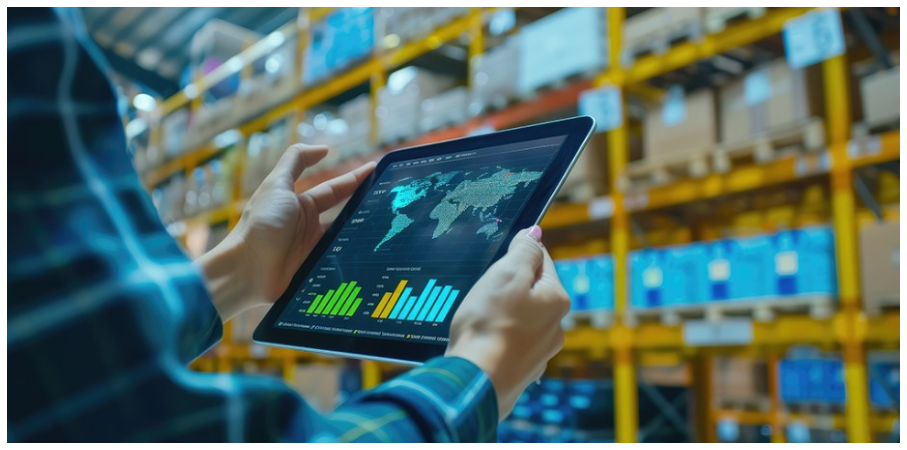

In [128]:
from scipy.stats import ttest_ind
import cv2
import matplotlib.pyplot as plt
image_path = r"D:\desctop\mmm.jpg"  
im = cv2.imread(image_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 10))  
plt.imshow(im)
plt.axis("off") 
plt.show()

# Import the Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Data Analysis and Data Understanding

In [130]:
df = pd.read_csv(r'D:\desctop\retail_store_inventory.CSV')

In [131]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [132]:
df.shape

(73100, 15)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [134]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [135]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [136]:
df.duplicated().sum()

0

In [137]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Date: 731 unique values
Store ID: 5 unique values
Product ID: 20 unique values
Category: 5 unique values
Region: 4 unique values
Inventory Level: 451 unique values
Units Sold: 498 unique values
Units Ordered: 181 unique values
Demand Forecast: 31608 unique values
Price: 8999 unique values
Discount: 5 unique values
Weather Condition: 4 unique values
Holiday/Promotion: 2 unique values
Competitor Pricing: 9751 unique values
Seasonality: 4 unique values


In [138]:
df.describe(include='all')

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
count,73100,73100,73100,73100,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100,73100.000000,73100.000000,73100
unique,731,5,20,5,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4
top,2022-01-01,S001,P0001,Furniture,East,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,NaN,Spring
freq,100,14620,3655,14699,18349,NaN,NaN,NaN,NaN,NaN,NaN,18290,NaN,NaN,18317
mean,NaN,NaN,NaN,NaN,NaN,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,NaN,0.497305,55.146077,NaN
std,NaN,NaN,NaN,NaN,NaN,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,NaN,0.499996,26.191408,NaN
min,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,NaN,0.000000,5.030000,NaN
25%,NaN,NaN,NaN,NaN,NaN,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,NaN,0.000000,32.680000,NaN
50%,NaN,NaN,NaN,NaN,NaN,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,NaN,0.000000,55.010000,NaN
75%,NaN,NaN,NaN,NaN,NaN,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,NaN,1.000000,77.820000,NaN


In [139]:
for col in df.columns:
    print(col)

Date
Store ID
Product ID
Category
Region
Inventory Level
Units Sold
Units Ordered
Demand Forecast
Price
Discount
Weather Condition
Holiday/Promotion
Competitor Pricing
Seasonality


In [140]:
if (df['Price'] < 0).any():
    print("There are negative values in the 'Price' column.")
else:
    print("No negative values in the 'Price' column.")

if (df['Units Sold'] < 0).any():
    print("There are negative values in the 'Units Sold' column.")
else:
    print("No negative values in the 'Units Sold' column.")

if (df['Inventory Level'] < 0).any():
    print("There are negative values in the 'Inventory Level' column.")
else:
    print("No negative values in the 'Inventory Level' column.")

if (df['Units Ordered'] < 0).any():
    print("There are negative values in the 'Units Ordered' column.")
else:
    print("No negative values in the 'Units Ordered' column.")

No negative values in the 'Price' column.
No negative values in the 'Units Sold' column.
No negative values in the 'Inventory Level' column.
No negative values in the 'Units Ordered' column.


In [141]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if (df['Date'] > pd.Timestamp.today()).any():
    print("There are future dates in the data.")
else:
    print("No future dates in the data.")

if (df['Date'] < '2000-01-01').any():
    print("There are dates before the year 2000 in the data.")
else:
    print("No dates before the year 2000 in the data.")

No future dates in the data.
No dates before the year 2000 in the data.


In [142]:
if (df['Units Ordered'] > df['Inventory Level']).any():
    print("There are instances where the number of orders exceeds the inventory level.")
else:
    print("No instances where the number of orders exceeds the inventory level.")

if (df['Price'] <= 0).any():
    print("There are illogical price values (zero or negative) in some rows.")
else:
    print("All values in the 'Price' column are logical.")

There are instances where the number of orders exceeds the inventory level.
All values in the 'Price' column are logical.


In [143]:
expected_weather_conditions = ['Sunny', 'Rainy', 'Cloudy', 'Stormy']
invalid_weather_conditions = df[~df['Weather Condition'].isin(expected_weather_conditions)]

if not invalid_weather_conditions.empty:
    print(f"Invalid values in 'Weather Condition' column:\n{invalid_weather_conditions['Weather Condition']}")
else:
    print("No invalid values in the 'Weather Condition' column.")

expected_seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
invalid_seasons = df[~df['Seasonality'].isin(expected_seasons)]

if not invalid_seasons.empty:
    print(f"Invalid values in 'Seasonality' column:\n{invalid_seasons['Seasonality']}")
else:
    print("No invalid values in the 'Seasonality' column.")

Invalid values in 'Weather Condition' column:
11       Snowy
14       Snowy
22       Snowy
27       Snowy
29       Snowy
         ...  
73085    Snowy
73090    Snowy
73092    Snowy
73093    Snowy
73095    Snowy
Name: Weather Condition, Length: 18272, dtype: object
No invalid values in the 'Seasonality' column.


# Data Cleaning & Preprocessing

In [144]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")  
df.set_index("Date", inplace=True)

# Outlier Treatment

In [145]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound))

outliers_count = outliers.sum()
print(outliers_count)

Inventory Level         0
Units Sold            715
Units Ordered           0
Demand Forecast       732
Price                   0
Discount                0
Holiday/Promotion       0
Competitor Pricing      0
dtype: int64


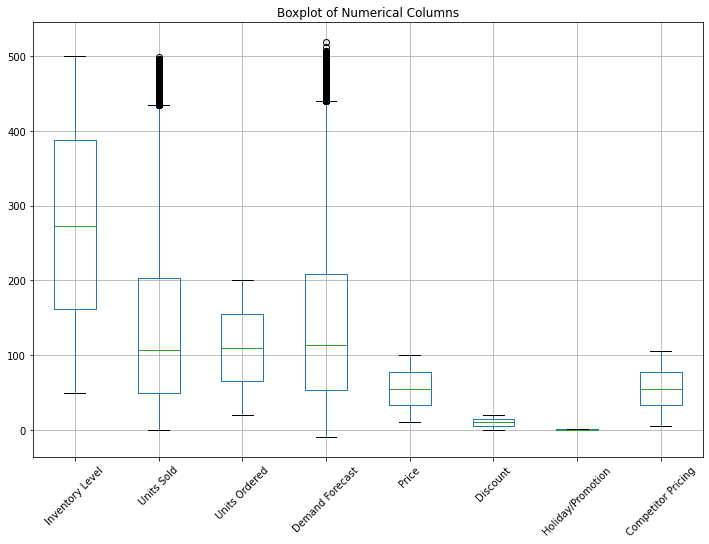

In [146]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot()
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

In [147]:
df_no_outliers = df[~outliers.any(axis=1)]

outliers_count = outliers.sum().sum()  
print(f'Number of outliers removed: {outliers_count}')

Number of outliers removed: 1447


# Feature Transformation
# Normalization

In [148]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df_no_outliers.select_dtypes(include=[np.number]).columns

scaler = MinMaxScaler()
df_no_outliers[numeric_columns] = scaler.fit_transform(df_no_outliers[numeric_columns])

df_no_outliers.head()

<ipython-input-148-75577cd26842>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[numeric_columns] = scaler.fit_transform(df_no_outliers[numeric_columns])


,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
Date,,,,,,,,,,,,,,
2022-01-01,S001,P0001,Groceries,North,0.402222,0.292627,0.194444,0.323539,0.261111,1.00,Rainy,0.0,0.246822,Autumn
2022-01-01,S004,P0013,Furniture,East,0.313333,0.129032,0.250000,0.143375,0.575667,0.00,Sunny,0.0,0.589430,Autumn
2022-01-01,S004,P0012,Electronics,North,0.664444,0.020737,0.805556,0.024333,0.047222,0.25,Rainy,1.0,0.135422,Spring
2022-01-01,S004,P0011,Electronics,West,0.344444,0.105991,0.038889,0.125981,0.498222,0.00,Sunny,1.0,0.527775,Spring
2022-01-01,S004,P0010,Groceries,East,0.882222,0.239631,0.422222,0.278076,0.260889,0.75,Cloudy,0.0,0.321489,Summer


# Categorical Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_columns = ['Store ID', 'Product ID']  
label_encoder = LabelEncoder()

for col in label_columns:
    df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])

df_no_outliers = pd.get_dummies(df_no_outliers, columns=['Category', 'Region', 'Weather Condition', 'Seasonality'], drop_first=True)

df_no_outliers.head()

<ipython-input-149-fcf1ec4abd85>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])
<ipython-input-149-fcf1ec4abd85>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = label_encoder.fit_transform(df_no_outliers[col])


,Store ID,Product ID,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,...,Category_Toys,Region_North,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0,0,0.402222,0.292627,0.194444,0.323539,0.261111,1.00,0.0,0.246822,...,False,True,False,False,True,False,False,False,False,False
2022-01-01,3,12,0.313333,0.129032,0.250000,0.143375,0.575667,0.00,0.0,0.589430,...,False,False,False,False,False,False,True,False,False,False
2022-01-01,3,11,0.664444,0.020737,0.805556,0.024333,0.047222,0.25,1.0,0.135422,...,False,True,False,False,True,False,False,True,False,False
2022-01-01,3,10,0.344444,0.105991,0.038889,0.125981,0.498222,0.00,1.0,0.527775,...,False,False,False,True,False,False,True,True,False,False
2022-01-01,3,9,0.882222,0.239631,0.422222,0.278076,0.260889,0.75,0.0,0.321489,...,False,False,False,False,False,False,False,False,True,False


# Feature Creation
# Feature Interaction

In [150]:
df_no_outliers = df_no_outliers.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [151]:
df_no_outliers['Weather_Seasonality'] = (
    df_no_outliers['Weather Condition_Rainy'] * df_no_outliers['Seasonality_Spring'] +
    df_no_outliers['Weather Condition_Sunny'] * df_no_outliers['Seasonality_Summer'] +
    df_no_outliers['Weather Condition_Snowy'] * df_no_outliers['Seasonality_Winter']
)

df_no_outliers['Price_Discount'] = df_no_outliers['Price'] * df_no_outliers['Discount']
df_no_outliers['Inventory_Demand'] = df_no_outliers['Inventory Level'] * df_no_outliers['Demand Forecast']
df_no_outliers['UnitsSold_Price'] = df_no_outliers['Units Sold'] * df_no_outliers['Price']

df_no_outliers.head()

,Store ID,Product ID,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,...,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Weather_Seasonality,Price_Discount,Inventory_Demand,UnitsSold_Price
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0,0,0.402222,0.292627,0.194444,0.323539,0.261111,1.00,0.0,0.246822,...,1,0,0,0,0,0,0,0.261111,0.130135,0.076408
2022-01-01,3,12,0.313333,0.129032,0.250000,0.143375,0.575667,0.00,0.0,0.589430,...,0,0,1,0,0,0,0,0.000000,0.044924,0.074280
2022-01-01,3,11,0.664444,0.020737,0.805556,0.024333,0.047222,0.25,1.0,0.135422,...,1,0,0,1,0,0,1,0.011806,0.016168,0.000979
2022-01-01,3,10,0.344444,0.105991,0.038889,0.125981,0.498222,0.00,1.0,0.527775,...,0,0,1,1,0,0,0,0.000000,0.043394,0.052807
2022-01-01,3,9,0.882222,0.239631,0.422222,0.278076,0.260889,0.75,0.0,0.321489,...,0,0,0,0,1,0,0,0.195667,0.245324,0.062517


# Augmented Dickey-Fuller Test

In [152]:
from statsmodels.tsa.stattools import adfuller

targets = ['Units Sold', 'Demand Forecast']

for target in targets:
    print(f"\n Augmented Dickey-Fuller Test for: {target}")
    
    series = df_no_outliers[target].dropna()

    adf_result = adfuller(series)

    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")

    if adf_result[1] < 0.05:
        print(f" {target} data is stationary (Null hypothesis rejected, no unit root).")
    else:
        print(f" {target} data is non-stationary (Transformation may be needed).")


 Augmented Dickey-Fuller Test for: Units Sold
ADF Statistic: -269.04806632897873
p-value: 0.0
Critical Values:
   1%: -3.430440458719505
   5%: -2.861579981167954
   10%: -2.5667912806060857
 Units Sold data is stationary (Null hypothesis rejected, no unit root).

 Augmented Dickey-Fuller Test for: Demand Forecast
ADF Statistic: -268.99713029689605
p-value: 0.0
Critical Values:
   1%: -3.430440458719505
   5%: -2.861579981167954
   10%: -2.5667912806060857
 Demand Forecast data is stationary (Null hypothesis rejected, no unit root).


# Feature Selection
# Correlation

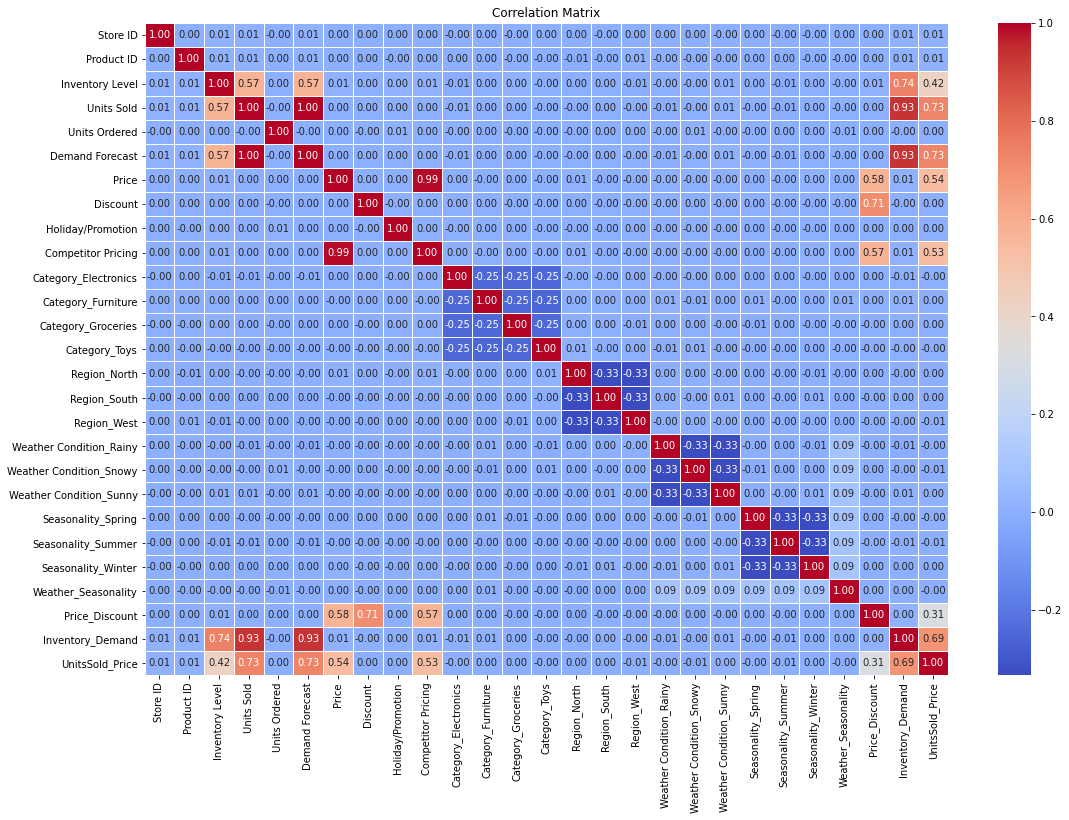

In [153]:
correlation_matrix = df_no_outliers.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# ANOVA

In [154]:
from sklearn.feature_selection import f_classif

targets = ['Units Sold', 'Demand Forecast']

for target in targets:
    print(f"\nANOVA Results for: {target}")
    
    X = df_no_outliers.drop([target], axis=1)
    y = df_no_outliers[target]
    
    f_stat, p_val = f_classif(X, y)
  
    result = pd.DataFrame({
        'Feature': X.columns,
        'F-Statistic': f_stat,
        'P-Value': p_val
    })
    
    print(result.sort_values(by='P-Value'))


ANOVA Results for: Units Sold
                    Feature   F-Statistic   P-Value
25          UnitsSold_Price    197.274389  0.000000
2           Inventory Level     84.301250  0.000000
4           Demand Forecast  24119.306909  0.000000
24         Inventory_Demand   1500.303641  0.000000
10       Category_Furniture      1.213216  0.001569
18  Weather Condition_Sunny      1.109690  0.057345
20       Seasonality_Summer      1.065269  0.168360
17  Weather Condition_Snowy      1.061793  0.180967
0                  Store ID      1.053549  0.213281
21       Seasonality_Winter      1.052902  0.215961
6                  Discount      1.037980  0.283255
14             Region_South      1.033659  0.304594
19       Seasonality_Spring      1.029327  0.326744
12            Category_Toys      0.992280  0.536344
1                Product ID      0.985411  0.576471
23           Price_Discount      0.985120  0.578156
7         Holiday/Promotion      0.984445  0.582072
16  Weather Condition_Rainy      

# RFE

In [155]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df_no_outliers.drop(['Units Sold', 'Demand Forecast'], axis=1) 
y = df_no_outliers['Units Sold']  

selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X, y)

print(f"Selected Features for Sales Prediction:")
selected_features_sales = X.columns[selector.support_]
print(selected_features_sales)

In [156]:
y = df_no_outliers['Demand Forecast']  
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X, y)

In [157]:
print(f"\nSelected Features for Demand Forecast Prediction:")
selected_features_demand = X.columns[selector.support_]
print(selected_features_demand)


Selected Features for Demand Forecast Prediction:
Index(['Inventory Level', 'Price', 'Competitor Pricing', 'Inventory_Demand',
       'UnitsSold_Price'],
      dtype='object')


# Feature Importance

In [158]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df_no_outliers.drop(['Units Sold', 'Demand Forecast'], axis=1)  
y_sales = df_no_outliers['Units Sold'] 
y_demand = df_no_outliers['Demand Forecast'] 

X_train, X_test, y_train_sales, y_test_sales = train_test_split(X, y_sales, test_size=0.2, random_state=42)
X_train, X_test, y_train_demand, y_test_demand = train_test_split(X, y_demand, test_size=0.2, random_state=42)

model_sales = xgb.XGBRegressor(objective='reg:squarederror')
model_sales.fit(X_train, y_train_sales)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [159]:
model_demand = xgb.XGBRegressor(objective='reg:squarederror')
model_demand.fit(X_train, y_train_demand)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [160]:
importances_sales = model_sales.feature_importances_
importances_demand = model_demand.feature_importances_

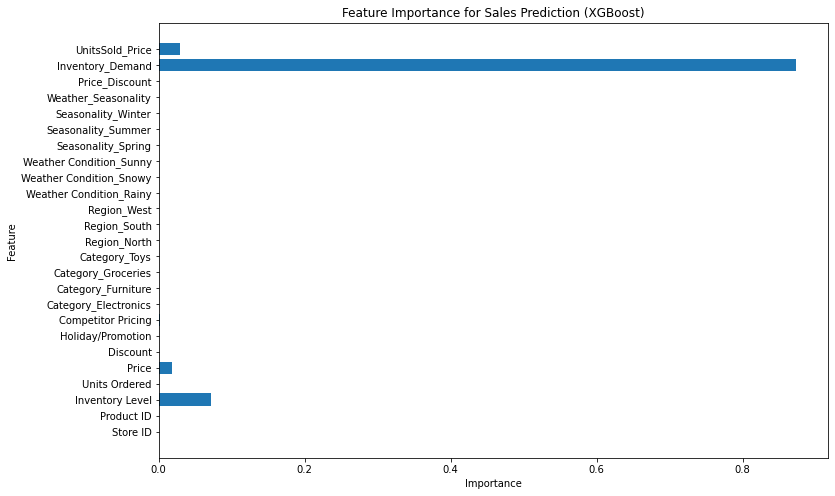

In [161]:
plt.figure(figsize=(12, 8))
plt.barh(X.columns, importances_sales)
plt.title('Feature Importance for Sales Prediction (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

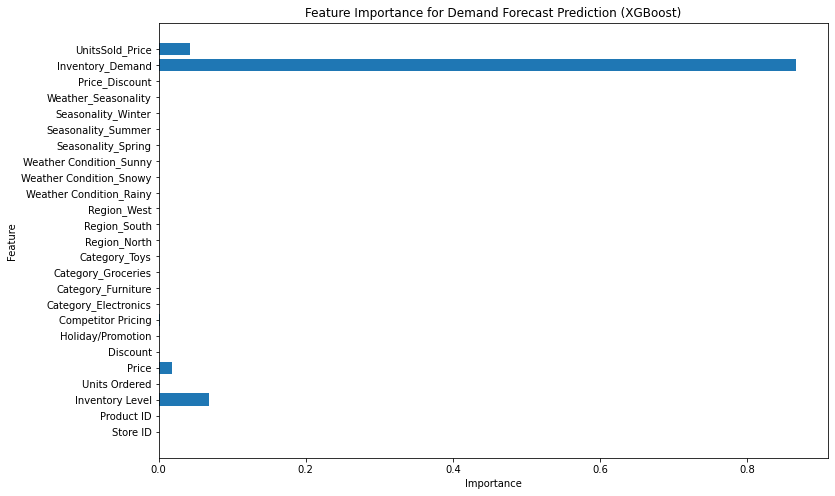

In [162]:
plt.figure(figsize=(12, 8))
plt.barh(X.columns, importances_demand)
plt.title('Feature Importance for Demand Forecast Prediction (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [163]:
print("\nFeature Importance for Sales Prediction (XGBoost):")
for feature, importance in zip(X.columns, importances_sales):
    print(f"{feature}: {importance:.4f}")

print("\nFeature Importance for Demand Forecast Prediction (XGBoost):")
for feature, importance in zip(X.columns, importances_demand):
    print(f"{feature}: {importance:.4f}")


Feature Importance for Sales Prediction (XGBoost):
Store ID: 0.0002
Product ID: 0.0003
Inventory Level: 0.0722
Units Ordered: 0.0003
Price: 0.0180
Discount: 0.0003
Holiday/Promotion: 0.0003
Competitor Pricing: 0.0014
Category_Electronics: 0.0003
Category_Furniture: 0.0003
Category_Groceries: 0.0003
Category_Toys: 0.0002
Region_North: 0.0003
Region_South: 0.0004
Region_West: 0.0003
Weather Condition_Rainy: 0.0002
Weather Condition_Snowy: 0.0004
Weather Condition_Sunny: 0.0003
Seasonality_Spring: 0.0003
Seasonality_Summer: 0.0003
Seasonality_Winter: 0.0004
Weather_Seasonality: 0.0003
Price_Discount: 0.0004
Inventory_Demand: 0.8735
UnitsSold_Price: 0.0289

Feature Importance for Demand Forecast Prediction (XGBoost):
Store ID: 0.0001
Product ID: 0.0001
Inventory Level: 0.0687
Units Ordered: 0.0001
Price: 0.0178
Discount: 0.0001
Holiday/Promotion: 0.0001
Competitor Pricing: 0.0013
Category_Electronics: 0.0001
Category_Furniture: 0.0001
Category_Groceries: 0.0002
Category_Toys: 0.0001
Regio

# Dimensionality Reduction
# PCA

In [164]:
from sklearn.decomposition import PCA

X = df_no_outliers.drop(columns=['Units Sold', 'Demand Forecast'])  
X = X.select_dtypes(include=[float, int]) 

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

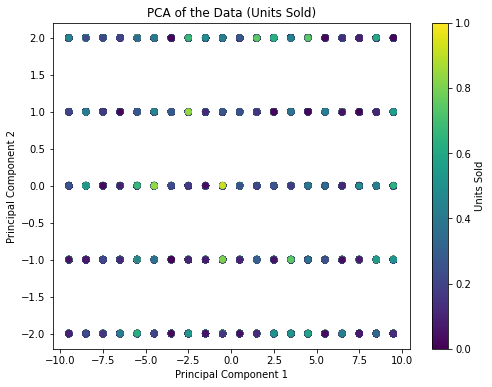

In [165]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_no_outliers['Units Sold'], cmap='viridis', label='Units Sold')
plt.title('PCA of the Data (Units Sold)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Units Sold')
plt.show()

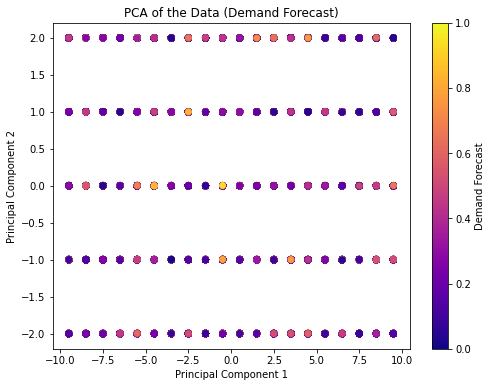

In [166]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_no_outliers['Demand Forecast'], cmap='plasma', label='Demand Forecast')
plt.title('PCA of the Data (Demand Forecast)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Demand Forecast')
plt.show()

In [167]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio by each Principal Component:")
for i, var in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {var:.4f} ({var*100:.2f}%)")

Explained Variance Ratio by each Principal Component:
Principal Component 1: 0.8623 (86.23%)
Principal Component 2: 0.0519 (5.19%)


# Train-Test Split

In [168]:
Xf = df_no_outliers[['Inventory Level', 'Price', 'Seasonality_Summer', 'Inventory_Demand', 'UnitsSold_Price']]
Yt = df_no_outliers[['Units Sold', 'Demand Forecast']]

Xf_train, Xf_test, Yt_train, Yt_test = train_test_split(Xf, Yt, test_size=0.2, random_state=42)

print(f"Training set shape - Xf_train: {Xf_train.shape}, Yt_train: {Yt_train.shape}")
print(f"Test set shape - Xf_test: {Xf_test.shape}, Yt_test: {Yt_test.shape}")

Training set shape - Xf_train: (57835, 5), Yt_train: (57835, 2)
Test set shape - Xf_test: (14459, 5), Yt_test: (14459, 2)


# Model building

# To deal with two objectives (demand and sales) is to use multi-task learning models.

# XGBRegressor

In [169]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = MultiOutputRegressor(XGBRegressor(n_estimators=100, random_state=42))
model.fit(Xf_train, Yt_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [170]:
y_pred = model.predict(Xf_test)

In [171]:
mae_units_sold = mean_absolute_error(Yt_test['Units Sold'], y_pred[:, 0])
mse_units_sold = mean_squared_error(Yt_test['Units Sold'], y_pred[:, 0])
rmse_units_sold = np.sqrt(mse_units_sold)
r2_units_sold = r2_score(Yt_test['Units Sold'], y_pred[:, 0])

mae_demand_forecast = mean_absolute_error(Yt_test['Demand Forecast'], y_pred[:, 1])
mse_demand_forecast = mean_squared_error(Yt_test['Demand Forecast'], y_pred[:, 1])
rmse_demand_forecast = np.sqrt(mse_demand_forecast)
r2_demand_forecast = r2_score(Yt_test['Demand Forecast'], y_pred[:, 1])

print(f"Units Sold - MAE: {mae_units_sold:.4f}, MSE: {mse_units_sold:.4f}, RMSE: {rmse_units_sold:.4f}, R²: {r2_units_sold:.4f}")
print(f"Demand Forecast - MAE: {mae_demand_forecast:.4f}, MSE: {mse_demand_forecast:.4f}, RMSE: {rmse_demand_forecast:.4f}, R²: {r2_demand_forecast:.4f}")

Units Sold - MAE: 0.0100, MSE: 0.0002, RMSE: 0.0135, R²: 0.9968
Demand Forecast - MAE: 0.0052, MSE: 0.0000, RMSE: 0.0070, R²: 0.9991


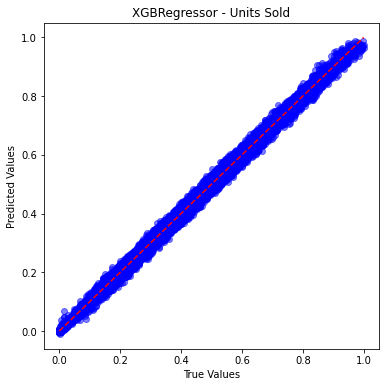

In [172]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Units Sold'], y_pred[:, 0], color='blue', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("XGBRegressor - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()


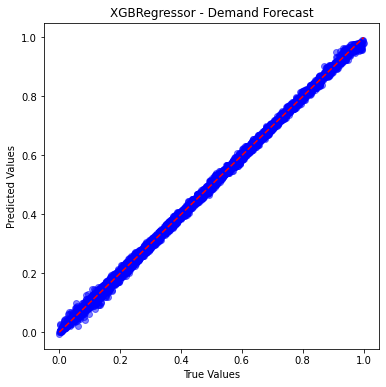

In [173]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Demand Forecast'], y_pred[:, 1], color='blue', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("XGBRegressor - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# RandomForestRegressor

In [174]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(Xf_train, Yt_train)

RandomForestRegressor(random_state=42)

In [175]:
y_pred_rf = rf_model.predict(Xf_test)

In [176]:
mae_units_sold_rf = mean_absolute_error(Yt_test['Units Sold'], y_pred_rf[:, 0])
mse_units_sold_rf = mean_squared_error(Yt_test['Units Sold'], y_pred_rf[:, 0])
rmse_units_sold_rf = np.sqrt(mse_units_sold_rf)
r2_units_sold_rf = r2_score(Yt_test['Units Sold'], y_pred_rf[:, 0])

mae_demand_forecast_rf = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_rf[:, 1])
mse_demand_forecast_rf = mean_squared_error(Yt_test['Demand Forecast'], y_pred_rf[:, 1])
rmse_demand_forecast_rf = np.sqrt(mse_demand_forecast_rf)
r2_demand_forecast_rf = r2_score(Yt_test['Demand Forecast'], y_pred_rf[:, 1])

print(f"RandomForestRegressor - Units Sold - MAE: {mae_units_sold_rf:.4f}, MSE: {mse_units_sold_rf:.4f}, RMSE: {rmse_units_sold_rf:.4f}, R²: {r2_units_sold_rf:.4f}")
print(f"RandomForestRegressor - Demand Forecast - MAE: {mae_demand_forecast_rf:.4f}, MSE: {mse_demand_forecast_rf:.4f}, RMSE: {rmse_demand_forecast_rf:.4f}, R²: {r2_demand_forecast_rf:.4f}")

RandomForestRegressor - Units Sold - MAE: 0.0111, MSE: 0.0003, RMSE: 0.0159, R²: 0.9956
RandomForestRegressor - Demand Forecast - MAE: 0.0053, MSE: 0.0001, RMSE: 0.0093, R²: 0.9984


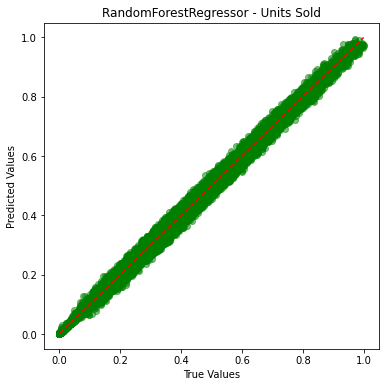

In [177]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Units Sold'], y_pred_rf[:, 0], color='green', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("RandomForestRegressor - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

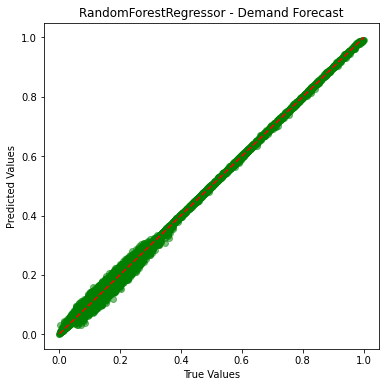

In [178]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Demand Forecast'], y_pred_rf[:, 1], color='green', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("RandomForestRegressor - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# GradientBoostingRegressor

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model_units_sold = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_units_sold.fit(Xf_train, Yt_train['Units Sold'])

GradientBoostingRegressor(random_state=42)

In [180]:
y_pred_gb_units_sold = gb_model_units_sold.predict(Xf_test)

In [181]:
mae_units_sold_gb = mean_absolute_error(Yt_test['Units Sold'], y_pred_gb_units_sold)
mse_units_sold_gb = mean_squared_error(Yt_test['Units Sold'], y_pred_gb_units_sold)
rmse_units_sold_gb = np.sqrt(mse_units_sold_gb)
r2_units_sold_gb = r2_score(Yt_test['Units Sold'], y_pred_gb_units_sold)

print(f"GradientBoostingRegressor - Units Sold - MAE: {mae_units_sold_gb:.4f}, MSE: {mse_units_sold_gb:.4f}, RMSE: {rmse_units_sold_gb:.4f}, R²: {r2_units_sold_gb:.4f}")

GradientBoostingRegressor - Units Sold - MAE: 0.0177, MSE: 0.0005, RMSE: 0.0228, R²: 0.9909


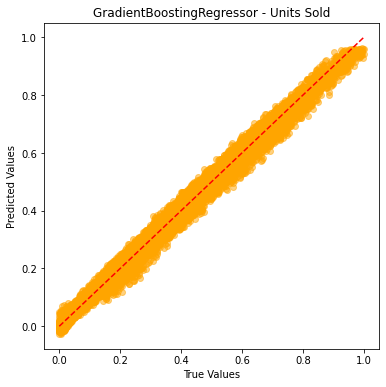

In [182]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Units Sold'], y_pred_gb_units_sold, color='orange', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("GradientBoostingRegressor - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [183]:
gb_model_demand_forecast = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_demand_forecast.fit(Xf_train, Yt_train['Demand Forecast'])

GradientBoostingRegressor(random_state=42)

In [184]:
y_pred_gb_demand_forecast = gb_model_demand_forecast.predict(Xf_test)

In [185]:
mae_demand_forecast_gb = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_gb_demand_forecast)
mse_demand_forecast_gb = mean_squared_error(Yt_test['Demand Forecast'], y_pred_gb_demand_forecast)
rmse_demand_forecast_gb = np.sqrt(mse_demand_forecast_gb)
r2_demand_forecast_gb = r2_score(Yt_test['Demand Forecast'], y_pred_gb_demand_forecast)

print(f"GradientBoostingRegressor - Demand Forecast - MAE: {mae_demand_forecast_gb:.4f}, MSE: {mse_demand_forecast_gb:.4f}, RMSE: {rmse_demand_forecast_gb:.4f}, R²: {r2_demand_forecast_gb:.4f}")

GradientBoostingRegressor - Demand Forecast - MAE: 0.0145, MSE: 0.0004, RMSE: 0.0189, R²: 0.9934


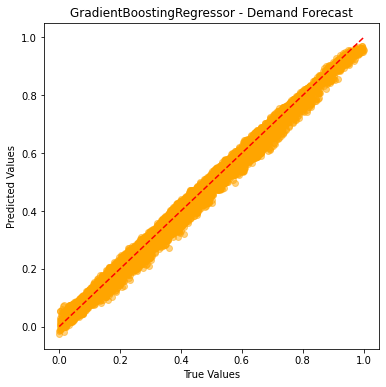

In [186]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Demand Forecast'], y_pred_gb_demand_forecast, color='orange', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("GradientBoostingRegressor - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# SVM

In [187]:
from sklearn.svm import SVR

svr_model_units_sold = SVR(kernel='rbf')
svr_model_units_sold.fit(Xf_train, Yt_train['Units Sold'])

SVR()

In [188]:
y_pred_svr_units_sold = svr_model_units_sold.predict(Xf_test)

In [189]:
mae_units_sold_svr = mean_absolute_error(Yt_test['Units Sold'], y_pred_svr_units_sold)
mse_units_sold_svr = mean_squared_error(Yt_test['Units Sold'], y_pred_svr_units_sold)
rmse_units_sold_svr = np.sqrt(mse_units_sold_svr)
r2_units_sold_svr = r2_score(Yt_test['Units Sold'], y_pred_svr_units_sold)

print(f"SVR - Units Sold - MAE: {mae_units_sold_svr:.4f}, MSE: {mse_units_sold_svr:.4f}, RMSE: {rmse_units_sold_svr:.4f}, R²: {r2_units_sold_svr:.4f}")

SVR - Units Sold - MAE: 0.0358, MSE: 0.0018, RMSE: 0.0429, R²: 0.9680


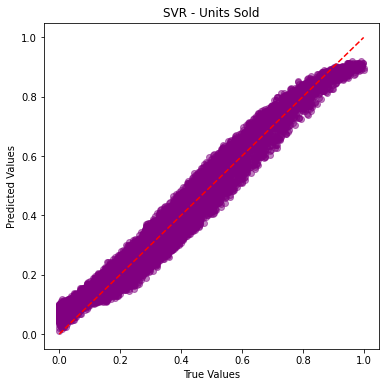

In [190]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Units Sold'], y_pred_svr_units_sold, color='purple', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("SVR - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [191]:
svr_model_demand_forecast = SVR(kernel='rbf')
svr_model_demand_forecast.fit(Xf_train, Yt_train['Demand Forecast'])

SVR()

In [192]:
y_pred_svr_demand_forecast = svr_model_demand_forecast.predict(Xf_test)

In [193]:
mae_demand_forecast_svr = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_svr_demand_forecast)
mse_demand_forecast_svr = mean_squared_error(Yt_test['Demand Forecast'], y_pred_svr_demand_forecast)
rmse_demand_forecast_svr = np.sqrt(mse_demand_forecast_svr)
r2_demand_forecast_svr = r2_score(Yt_test['Demand Forecast'], y_pred_svr_demand_forecast)

print(f"SVR - Demand Forecast - MAE: {mae_demand_forecast_svr:.4f}, MSE: {mse_demand_forecast_svr:.4f}, RMSE: {rmse_demand_forecast_svr:.4f}, R²: {r2_demand_forecast_svr:.4f}")

SVR - Demand Forecast - MAE: 0.0410, MSE: 0.0023, RMSE: 0.0475, R²: 0.9579


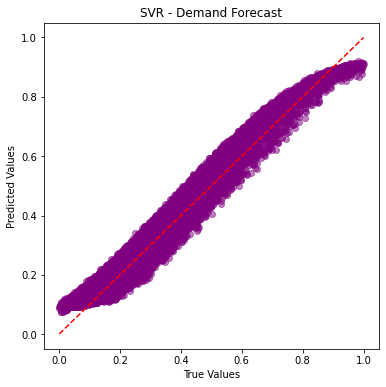

In [194]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Demand Forecast'], y_pred_svr_demand_forecast, color='purple', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("SVR - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# Ridge

In [195]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(Xf_train, Yt_train)

Ridge()

In [196]:
y_pred_ridge = ridge_model.predict(Xf_test)

In [197]:
mae_units_sold_ridge = mean_absolute_error(Yt_test['Units Sold'], y_pred_ridge[:, 0])
mse_units_sold_ridge = mean_squared_error(Yt_test['Units Sold'], y_pred_ridge[:, 0])
rmse_units_sold_ridge = np.sqrt(mse_units_sold_ridge)
r2_units_sold_ridge = r2_score(Yt_test['Units Sold'], y_pred_ridge[:, 0])

mae_demand_forecast_ridge = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_ridge[:, 1])
mse_demand_forecast_ridge = mean_squared_error(Yt_test['Demand Forecast'], y_pred_ridge[:, 1])
rmse_demand_forecast_ridge = np.sqrt(mse_demand_forecast_ridge)
r2_demand_forecast_ridge = r2_score(Yt_test['Demand Forecast'], y_pred_ridge[:, 1])

print(f"Ridge Regression - Units Sold - MAE: {mae_units_sold_ridge:.4f}, MSE: {mse_units_sold_ridge:.4f}, RMSE: {rmse_units_sold_ridge:.4f}, R²: {r2_units_sold_ridge:.4f}")
print(f"Ridge Regression - Demand Forecast - MAE: {mae_demand_forecast_ridge:.4f}, MSE: {mse_demand_forecast_ridge:.4f}, RMSE: {rmse_demand_forecast_ridge:.4f}, R²: {r2_demand_forecast_ridge:.4f}")

Ridge Regression - Units Sold - MAE: 0.0512, MSE: 0.0043, RMSE: 0.0654, R²: 0.9255
Ridge Regression - Demand Forecast - MAE: 0.0493, MSE: 0.0040, RMSE: 0.0633, R²: 0.9255


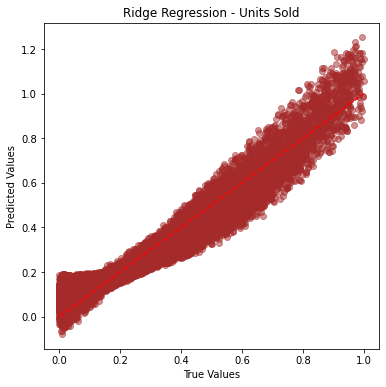

In [198]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Units Sold'], y_pred_ridge[:, 0], color='brown', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("Ridge Regression - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

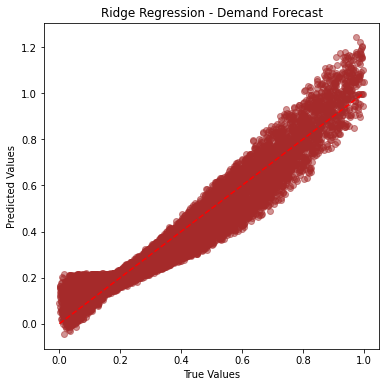

In [199]:
plt.figure(figsize=(6, 6))
plt.scatter(Yt_test['Demand Forecast'], y_pred_ridge[:, 1], color='brown', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("Ridge Regression - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# Comparison between machine learning models

In [200]:
results = {
    "Model": [
        "XGBRegressor - Units Sold", "XGBRegressor - Demand Forecast",
        "RandomForestRegressor - Units Sold", "RandomForestRegressor - Demand Forecast",
        "GradientBoostingRegressor - Units Sold", "GradientBoostingRegressor - Demand Forecast",
        "SVR - Units Sold", "SVR - Demand Forecast",
        "Ridge Regression - Units Sold", "Ridge Regression - Demand Forecast"
    ],
    "MAE": [
        mae_units_sold, mae_demand_forecast,
        mae_units_sold_rf, mae_demand_forecast_rf,
        mae_units_sold_gb, mae_demand_forecast_gb,
        mae_units_sold_svr, mae_demand_forecast_svr,
        mae_units_sold_ridge, mae_demand_forecast_ridge
    ],
    "MSE": [
        mse_units_sold, mse_demand_forecast,
        mse_units_sold_rf, mse_demand_forecast_rf,
        mse_units_sold_gb, mse_demand_forecast_gb,
        mse_units_sold_svr, mse_demand_forecast_svr,
        mse_units_sold_ridge, mse_demand_forecast_ridge
    ],
    "RMSE": [
        rmse_units_sold, rmse_demand_forecast,
        rmse_units_sold_rf, rmse_demand_forecast_rf,
        rmse_units_sold_gb, rmse_demand_forecast_gb,
        rmse_units_sold_svr, rmse_demand_forecast_svr,
        rmse_units_sold_ridge, rmse_demand_forecast_ridge
    ],
    "R²": [
        r2_units_sold, r2_demand_forecast,
        r2_units_sold_rf, r2_demand_forecast_rf,
        r2_units_sold_gb, r2_demand_forecast_gb,
        r2_units_sold_svr, r2_demand_forecast_svr,
        r2_units_sold_ridge, r2_demand_forecast_ridge
    ]
}

results_df = pd.DataFrame(results)

results_df

,Model,MAE,MSE,RMSE,R²
0,XGBRegressor - Units Sold,0.010032,0.000182,0.013499,0.996828
1,XGBRegressor - Demand Forecast,0.005243,0.000048,0.006956,0.999100
2,RandomForestRegressor - Units Sold,0.011052,0.000252,0.015873,0.995615
3,RandomForestRegressor - Demand Forecast,0.005330,0.000086,0.009290,0.998394
4,GradientBoostingRegressor - Units Sold,0.017715,0.000521,0.022816,0.990939
5,GradientBoostingRegressor - Demand Forecast,0.014542,0.000356,0.018869,0.993376
6,SVR - Units Sold,0.035783,0.001837,0.042859,0.968028
7,SVR - Demand Forecast,0.041026,0.002261,0.047546,0.957944
8,Ridge Regression - Units Sold,0.051181,0.004280,0.065423,0.925503
9,Ridge Regression - Demand Forecast,0.049260,0.004007,0.063302,0.925455


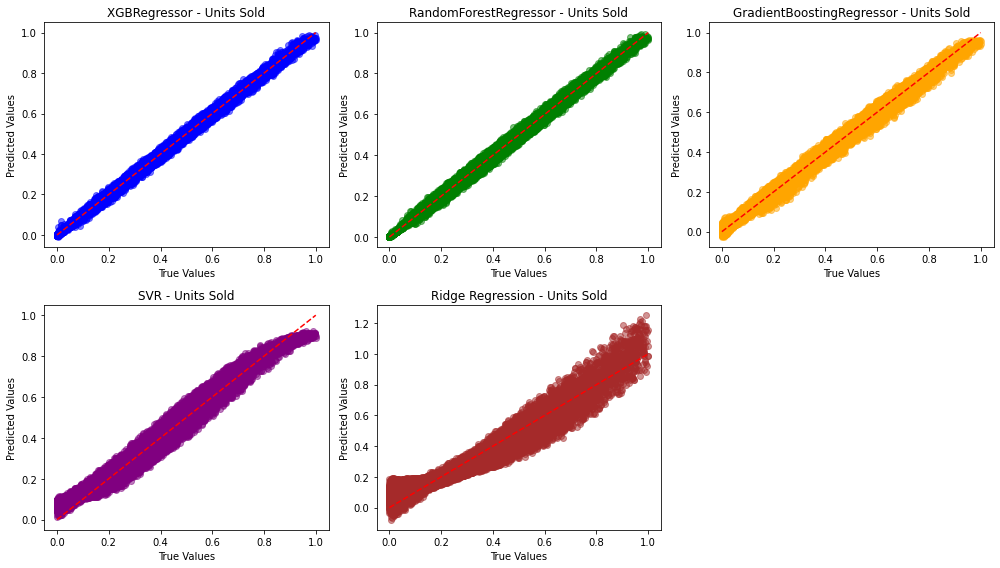

In [201]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.scatter(Yt_test['Units Sold'], y_pred[:, 0], color='blue', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("XGBRegressor - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 2)
plt.scatter(Yt_test['Units Sold'], y_pred_rf[:, 0], color='green', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("RandomForestRegressor - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 3)
plt.scatter(Yt_test['Units Sold'], y_pred_gb_units_sold, color='orange', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("GradientBoostingRegressor - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 4)
plt.scatter(Yt_test['Units Sold'], y_pred_svr_units_sold, color='purple', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("SVR - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 5)
plt.scatter(Yt_test['Units Sold'], y_pred_ridge[:, 0], color='brown', alpha=0.5)
plt.plot([Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], [Yt_test['Units Sold'].min(), Yt_test['Units Sold'].max()], color='red', linestyle='--')
plt.title("Ridge Regression - Units Sold")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


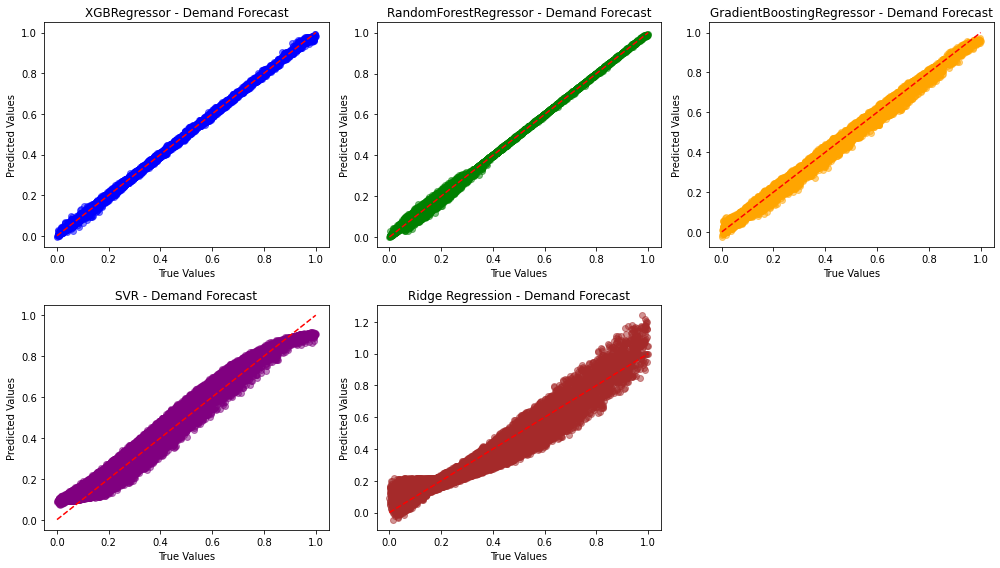

In [202]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.scatter(Yt_test['Demand Forecast'], y_pred[:, 1], color='blue', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("XGBRegressor - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 2)
plt.scatter(Yt_test['Demand Forecast'], y_pred_rf[:, 1], color='green', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("RandomForestRegressor - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 3)
plt.scatter(Yt_test['Demand Forecast'], y_pred_gb_demand_forecast, color='orange', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("GradientBoostingRegressor - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 4)
plt.scatter(Yt_test['Demand Forecast'], y_pred_svr_demand_forecast, color='purple', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("SVR - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 3, 5)
plt.scatter(Yt_test['Demand Forecast'], y_pred_ridge[:, 1], color='brown', alpha=0.5)
plt.plot([Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], [Yt_test['Demand Forecast'].min(), Yt_test['Demand Forecast'].max()], color='red', linestyle='--')
plt.title("Ridge Regression - Demand Forecast")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

# LSTM

In [203]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X_train_lstm = Xf_train.values.reshape((Xf_train.shape[0], 1, Xf_train.shape[1]))
X_test_lstm = Xf_test.values.reshape((Xf_test.shape[0], 1, Xf_test.shape[1]))

In [204]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(2)) 
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [205]:
history = lstm_model.fit(X_train_lstm, Yt_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, Yt_test))

Epoch 1/10
1808/1808 [==============================] - 13s 6ms/step - loss: 0.0072 - val_loss: 8.5207e-04
Epoch 2/10
1808/1808 [==============================] - 13s 7ms/step - loss: 5.6762e-04 - val_loss: 3.7930e-04
Epoch 3/10
1808/1808 [==============================] - 12s 7ms/step - loss: 3.0408e-04 - val_loss: 2.4325e-04
Epoch 4/10
1808/1808 [==============================] - 11s 6ms/step - loss: 2.3158e-04 - val_loss: 2.1810e-04
Epoch 5/10
1808/1808 [==============================] - 11s 6ms/step - loss: 1.9893e-04 - val_loss: 1.7970e-04
Epoch 6/10
1808/1808 [==============================] - 11s 6ms/step - loss: 1.7910e-04 - val_loss: 1.7294e-04
Epoch 7/10
1808/1808 [==============================] - 11s 6ms/step - loss: 1.6474e-04 - val_loss: 1.5402e-04
Epoch 8/10
1808/1808 [==============================] - 11s 6ms/step - loss: 1.5184e-04 - val_loss: 1.5787e-04
Epoch 9/10
1808/1808 [==============================] - 10s 6ms/step - loss: 1.4126e-04 - val_loss: 1.5279e-04
Epoch

In [206]:
y_pred_lstm = lstm_model.predict(X_test_lstm)

452/452 [==============================] - 2s 4ms/step


In [207]:
mae_lstm_sales = mean_absolute_error(Yt_test['Units Sold'], y_pred_lstm[:, 0])
mse_lstm_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_lstm[:, 0])
rmse_lstm_sales = np.sqrt(mse_lstm_sales)
r2_lstm_sales = r2_score(Yt_test['Units Sold'], y_pred_lstm[:, 0])

mae_lstm_demand = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_lstm[:, 1])
mse_lstm_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_lstm[:, 1])
rmse_lstm_demand = np.sqrt(mse_lstm_demand)
r2_lstm_demand = r2_score(Yt_test['Demand Forecast'], y_pred_lstm[:, 1])

print(f"LSTM - Sales Prediction: MAE: {mae_lstm_sales}, MSE: {mse_lstm_sales}, RMSE: {rmse_lstm_sales}, R²: {r2_lstm_sales}")
print(f"LSTM - Demand Forecast Prediction: MAE: {mae_lstm_demand}, MSE: {mse_lstm_demand}, RMSE: {rmse_lstm_demand}, R²: {r2_lstm_demand}")

LSTM - Sales Prediction: MAE: 0.008608295918702422, MSE: 0.000133845669639341, RMSE: 0.011569168926043953, R²: 0.9976703651480233
LSTM - Demand Forecast Prediction: MAE: 0.008262075021681956, MSE: 0.00011784054386378484, RMSE: 0.01085543844640947, R²: 0.9978077783026736


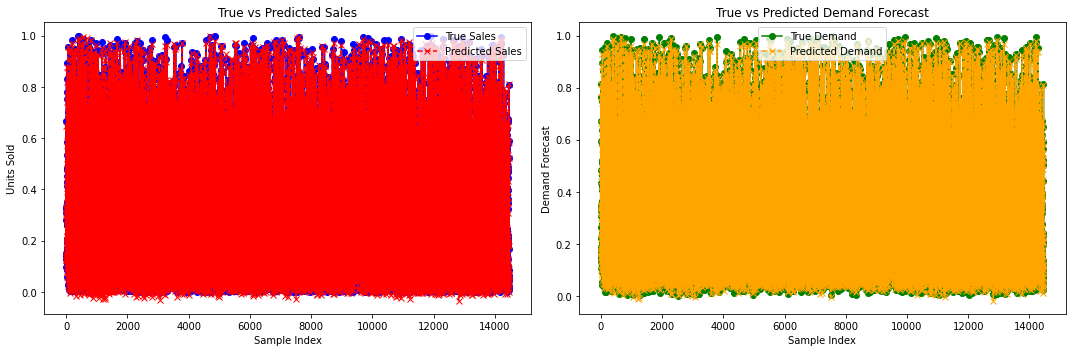

In [208]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(Yt_test['Units Sold'].values, label='True Sales', color='blue', linestyle='-', marker='o')
plt.plot(y_pred_lstm[:, 0], label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.title('True vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Units Sold')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Yt_test['Demand Forecast'].values, label='True Demand', color='green', linestyle='-', marker='o')
plt.plot(y_pred_lstm[:, 1], label='Predicted Demand', color='orange', linestyle='--', marker='x')
plt.title('True vs Predicted Demand Forecast')
plt.xlabel('Sample Index')
plt.ylabel('Demand Forecast')
plt.legend()

plt.tight_layout()
plt.show()

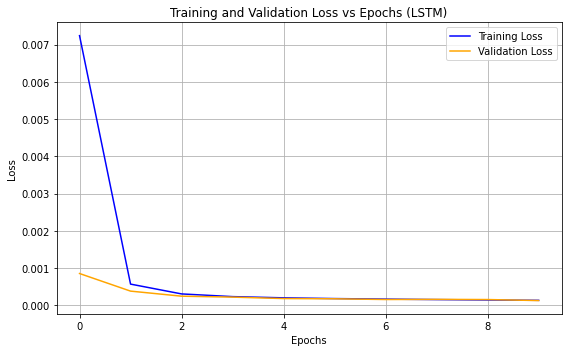

In [209]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss vs Epochs (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

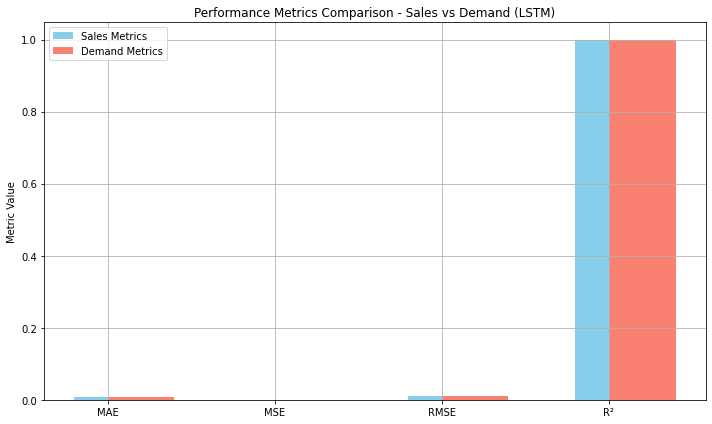

In [210]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
sales_metrics = [mae_lstm_sales, mse_lstm_sales, rmse_lstm_sales, r2_lstm_sales]
demand_metrics = [mae_lstm_demand, mse_lstm_demand, rmse_lstm_demand, r2_lstm_demand]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, sales_metrics, width=0.4, label='Sales Metrics', color='skyblue', align='center')
plt.bar(x, demand_metrics, width=0.4, label='Demand Metrics', color='salmon', align='edge')
plt.xticks(x, metrics)
plt.title('Performance Metrics Comparison - Sales vs Demand (LSTM)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# MLP

In [211]:
mlp_model = Sequential()
mlp_model.add(Dense(units=128, activation='relu', input_dim=Xf_train.shape[1])) 
mlp_model.add(Dense(units=64, activation='relu')) 
mlp_model.add(Dense(units=2))

In [212]:
mlp_model.compile(optimizer='adam', loss='mean_squared_error')
history_mlp = mlp_model.fit(Xf_train, Yt_train, epochs=50, batch_size=32, validation_data=(Xf_test, Yt_test))

Epoch 1/50
1808/1808 [==============================] - 12s 5ms/step - loss: 0.0013 - val_loss: 1.5890e-04
Epoch 2/50
1808/1808 [==============================] - 8s 4ms/step - loss: 1.5141e-04 - val_loss: 1.6247e-04
Epoch 3/50
1808/1808 [==============================] - 8s 5ms/step - loss: 1.2339e-04 - val_loss: 1.1335e-04
Epoch 4/50
1808/1808 [==============================] - 8s 5ms/step - loss: 1.0577e-04 - val_loss: 8.8359e-05
Epoch 5/50
1808/1808 [==============================] - 8s 5ms/step - loss: 9.4292e-05 - val_loss: 1.0214e-04
Epoch 6/50
1808/1808 [==============================] - 8s 4ms/step - loss: 8.7583e-05 - val_loss: 9.5407e-05
Epoch 7/50
1808/1808 [==============================] - 8s 5ms/step - loss: 8.1189e-05 - val_loss: 7.5451e-05
Epoch 8/50
1808/1808 [==============================] - 8s 4ms/step - loss: 7.4815e-05 - val_loss: 7.8286e-05
Epoch 9/50
1808/1808 [==============================] - 8s 5ms/step - loss: 7.0115e-05 - val_loss: 6.9116e-05
Epoch 10/50
1

In [213]:
y_pred_mlp = mlp_model.predict(Xf_test)

mae_mlp_sales = mean_absolute_error(Yt_test['Units Sold'], y_pred_mlp[:, 0])
mse_mlp_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_mlp[:, 0])
rmse_mlp_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_mlp[:, 0], squared=False)
r2_mlp_sales = r2_score(Yt_test['Units Sold'], y_pred_mlp[:, 0])

mae_mlp_demand = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_mlp[:, 1])
mse_mlp_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_mlp[:, 1])
rmse_mlp_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_mlp[:, 1], squared=False)
r2_mlp_demand = r2_score(Yt_test['Demand Forecast'], y_pred_mlp[:, 1])

print(f"MLP - Sales Prediction: MAE: {mae_mlp_sales}, MSE: {mse_mlp_sales}, RMSE: {rmse_mlp_sales}, R²: {r2_mlp_sales}")
print(f"MLP - Demand Forecast Prediction: MAE: {mae_mlp_demand}, MSE: {mse_mlp_demand}, RMSE: {rmse_mlp_demand}, R²: {r2_mlp_demand}")

452/452 [==============================] - 1s 3ms/step
MLP - Sales Prediction: MAE: 0.002872227253835326, MSE: 2.454262343721396e-05, RMSE: 0.004954051214633733, R²: 0.9995728262926075
MLP - Demand Forecast Prediction: MAE: 0.004380911200290909, MSE: 3.721337666291805e-05, RMSE: 0.006100276769370226, R²: 0.9993077087980388


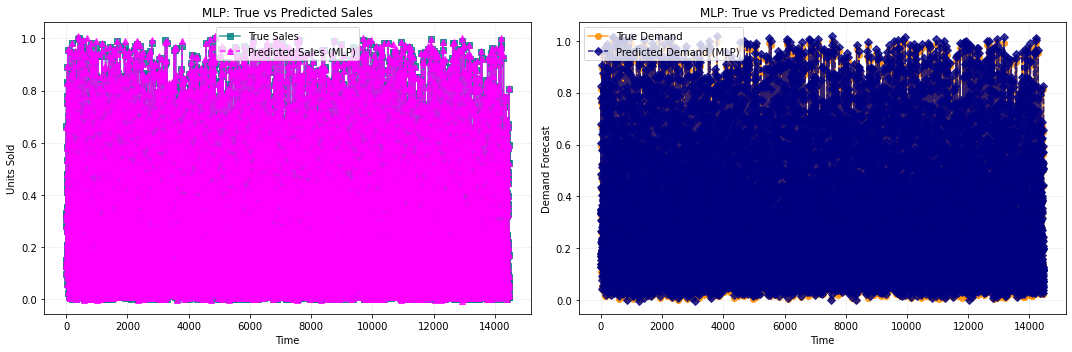

In [214]:
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 2, 1)
plt.plot(Yt_test['Units Sold'].values, label='True Sales', color='teal', linestyle='-', marker='s', alpha=0.8) 
plt.plot(y_pred_mlp[:, 0], label='Predicted Sales (MLP)', color='magenta', linestyle='--', marker='^', alpha=0.8)  
plt.title('MLP: True vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5) 


plt.subplot(1, 2, 2)
plt.plot(Yt_test['Demand Forecast'].values, label='True Demand', color='darkorange', linestyle='-', marker='o', alpha=0.8) 
plt.plot(y_pred_mlp[:, 1], label='Predicted Demand (MLP)', color='navy', linestyle='--', marker='D', alpha=0.8) 
plt.title('MLP: True vs Predicted Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Demand Forecast')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

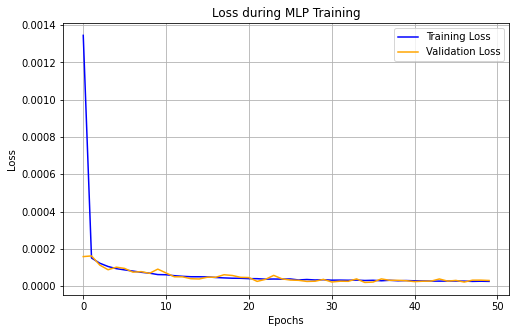

In [215]:
plt.figure(figsize=(8, 5))
plt.plot(history_mlp.history['loss'], label='Training Loss', color='blue')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss during MLP Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

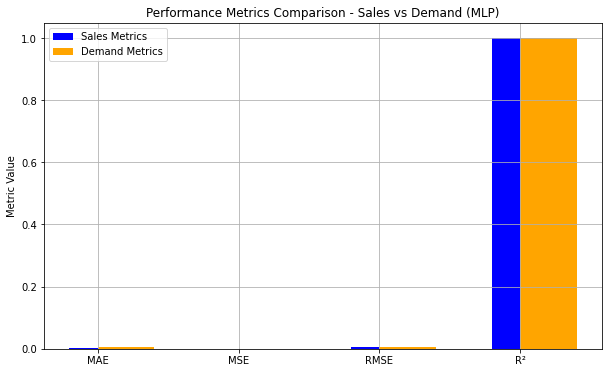

In [216]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
sales_metrics = [mae_mlp_sales, mse_mlp_sales, rmse_mlp_sales, r2_mlp_sales]
demand_metrics = [mae_mlp_demand, mse_mlp_demand, rmse_mlp_demand, r2_mlp_demand]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, sales_metrics, width=0.4, label='Sales Metrics', color='blue', align='center')
plt.bar(x, demand_metrics, width=0.4, label='Demand Metrics', color='orange', align='edge')
plt.xticks(x, metrics)
plt.title('Performance Metrics Comparison - Sales vs Demand (MLP)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# CNN

In [217]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense

Xf_train_cnn = Xf_train.values.reshape((Xf_train.shape[0], 1, Xf_train.shape[1]))
Xf_test_cnn = Xf_test.values.reshape((Xf_test.shape[0], 1, Xf_test.shape[1]))

In [218]:
input_layer = Input(shape=(Xf_train_cnn.shape[1], Xf_train_cnn.shape[2]))
conv1 = Conv1D(filters=64, kernel_size=1, activation='relu')(input_layer)
flat = Flatten()(conv1)
output = Dense(2)(flat)  

cnn_model = Model(inputs=input_layer, outputs=output)
cnn_model.compile(optimizer='adam', loss='mse')

In [219]:
history_cnn = cnn_model.fit(Xf_train_cnn, Yt_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
1446/1446 [==============================] - 7s 4ms/step - loss: 0.0041 - val_loss: 5.6323e-04
Epoch 2/10
1446/1446 [==============================] - 6s 4ms/step - loss: 4.3487e-04 - val_loss: 3.4372e-04
Epoch 3/10
1446/1446 [==============================] - 6s 4ms/step - loss: 3.1676e-04 - val_loss: 3.3587e-04
Epoch 4/10
1446/1446 [==============================] - 6s 4ms/step - loss: 2.6314e-04 - val_loss: 2.3836e-04
Epoch 5/10
1446/1446 [==============================] - 6s 4ms/step - loss: 2.3517e-04 - val_loss: 2.1106e-04
Epoch 6/10
1446/1446 [==============================] - 6s 4ms/step - loss: 2.1495e-04 - val_loss: 1.9447e-04
Epoch 7/10
1446/1446 [==============================] - 6s 4ms/step - loss: 2.0239e-04 - val_loss: 1.8655e-04
Epoch 8/10
1446/1446 [==============================] - 6s 4ms/step - loss: 1.8665e-04 - val_loss: 1.6658e-04
Epoch 9/10
1446/1446 [==============================] - 6s 4ms/step - loss: 1.7060e-04 - val_loss: 1.6227e-04
Epoch 10/10
14

In [220]:
y_pred_cnn = cnn_model.predict(Xf_test_cnn)

452/452 [==============================] - 1s 3ms/step


In [221]:
mae_cnn_sales = mean_absolute_error(Yt_test['Units Sold'], y_pred_cnn[:, 0])
mse_cnn_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_cnn[:, 0])
rmse_cnn_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_cnn[:, 0], squared=False)
r2_cnn_sales = r2_score(Yt_test['Units Sold'], y_pred_cnn[:, 0])

mae_cnn_demand = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_cnn[:, 1])
mse_cnn_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_cnn[:, 1])
rmse_cnn_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_cnn[:, 1], squared=False)
r2_cnn_demand = r2_score(Yt_test['Demand Forecast'], y_pred_cnn[:, 1])

print(f"CNN - Sales Prediction: MAE: {mae_cnn_sales}, MSE: {mse_cnn_sales}, RMSE: {rmse_cnn_sales}, R²: {r2_cnn_sales}")
print(f"CNN - Demand Forecast Prediction: MAE: {mae_cnn_demand}, MSE: {mse_cnn_demand}, RMSE: {rmse_cnn_demand}, R²: {r2_cnn_demand}")

CNN - Sales Prediction: MAE: 0.009738927932108872, MSE: 0.00016309823237642247, RMSE: 0.012770991832133574, R²: 0.9971612131534494
CNN - Demand Forecast Prediction: MAE: 0.008169693061671007, MSE: 0.00012132553833715202, RMSE: 0.011014787257916152, R²: 0.9977429459432066


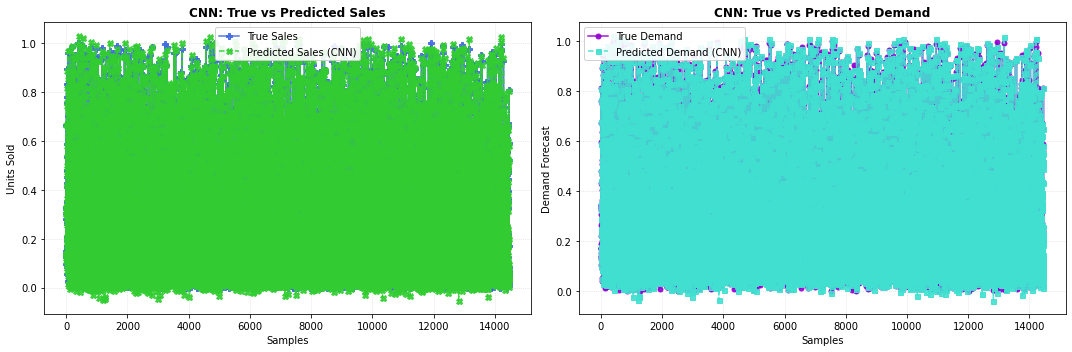

In [222]:
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 2, 1)
plt.plot(Yt_test['Units Sold'].values, label='True Sales', color='royalblue', linestyle='-', marker='P', markersize=6, alpha=0.9)  
plt.plot(y_pred_cnn[:, 0], label='Predicted Sales (CNN)', color='limegreen', linestyle='--', marker='X', markersize=6, alpha=0.9) 
plt.title('CNN: True vs Predicted Sales', fontweight='bold')
plt.xlabel('Samples', fontsize=10)
plt.ylabel('Units Sold', fontsize=10)
plt.legend(framealpha=0.9)
plt.grid(True, linestyle=':', linewidth=0.7, alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(Yt_test['Demand Forecast'].values, label='True Demand', color='darkviolet', linestyle='-', marker='o', markersize=5, alpha=0.9)  
plt.plot(y_pred_cnn[:, 1], label='Predicted Demand (CNN)', color='turquoise', linestyle='--', marker='s', markersize=5, alpha=0.9)  
plt.title('CNN: True vs Predicted Demand', fontweight='bold')
plt.xlabel('Samples', fontsize=10)
plt.ylabel('Demand Forecast', fontsize=10)
plt.legend(framealpha=0.9)
plt.grid(True, linestyle=':', linewidth=0.7, alpha=0.5)

plt.tight_layout()
plt.show()

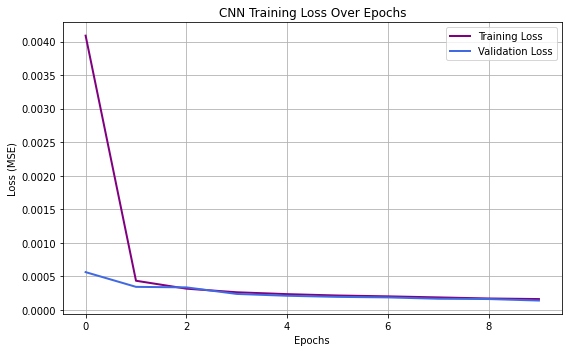

In [223]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn.history['loss'], label='Training Loss', color='purple', linewidth=2)
plt.plot(history_cnn.history['val_loss'], label='Validation Loss' ,color='royalblue', linewidth=2)
plt.title('CNN Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

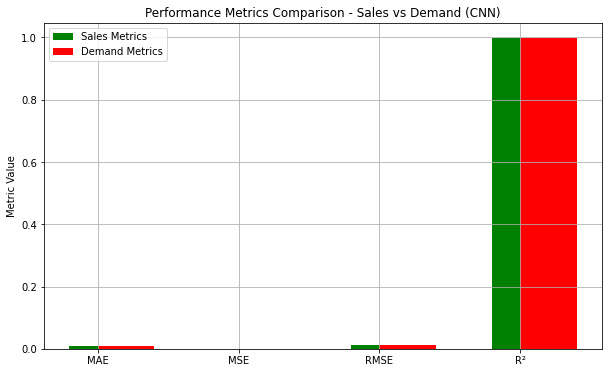

In [224]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
sales_metrics = [mae_cnn_sales, mse_cnn_sales, rmse_cnn_sales, r2_cnn_sales]
demand_metrics = [mae_cnn_demand, mse_cnn_demand, rmse_cnn_demand, r2_cnn_demand]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, sales_metrics, width=0.4, label='Sales Metrics', color='green', align='center')
plt.bar(x, demand_metrics, width=0.4, label='Demand Metrics', color='red', align='edge')
plt.xticks(x, metrics)
plt.title('Performance Metrics Comparison - Sales vs Demand (CNN)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

# BiLSTM

In [225]:
from tensorflow.keras.layers import Bidirectional

Xf_train_bilstm = Xf_train.values.reshape((Xf_train.shape[0], 1, Xf_train.shape[1]))
Xf_test_bilstm = Xf_test.values.reshape((Xf_test.shape[0], 1, Xf_test.shape[1]))

In [226]:
input_bilstm = Input(shape=(Xf_train_bilstm.shape[1], Xf_train_bilstm.shape[2]))
bilstm = Bidirectional(LSTM(units=64, activation='relu'))(input_bilstm)
output_bilstm = Dense(2)(bilstm)

bilstm_model = Model(inputs=input_bilstm, outputs=output_bilstm)
bilstm_model.compile(optimizer='adam', loss='mse')

history_bilstm = bilstm_model.fit(Xf_train_bilstm, Yt_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
1446/1446 [==============================] - 19s 8ms/step - loss: 0.0065 - val_loss: 5.8217e-04
Epoch 2/10
1446/1446 [==============================] - 11s 7ms/step - loss: 3.6861e-04 - val_loss: 2.5093e-04
Epoch 3/10
1446/1446 [==============================] - 10s 7ms/step - loss: 2.2259e-04 - val_loss: 1.9076e-04
Epoch 4/10
1446/1446 [==============================] - 11s 8ms/step - loss: 1.8062e-04 - val_loss: 1.7692e-04
Epoch 5/10
1446/1446 [==============================] - 10s 7ms/step - loss: 1.6021e-04 - val_loss: 1.4919e-04
Epoch 6/10
1446/1446 [==============================] - 11s 7ms/step - loss: 1.4541e-04 - val_loss: 1.3539e-04
Epoch 7/10
1446/1446 [==============================] - 10s 7ms/step - loss: 1.3185e-04 - val_loss: 1.2038e-04
Epoch 8/10
1446/1446 [==============================] - 10s 7ms/step - loss: 1.2209e-04 - val_loss: 1.2424e-04
Epoch 9/10
1446/1446 [==============================] - 11s 7ms/step - loss: 1.1290e-04 - val_loss: 1.1386e-04
Epoch

In [227]:
y_pred_bilstm = bilstm_model.predict(Xf_test_bilstm)

mae_bilstm_sales = mean_absolute_error(Yt_test['Units Sold'], y_pred_bilstm[:, 0])
mse_bilstm_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_bilstm[:, 0])
rmse_bilstm_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_bilstm[:, 0], squared=False)
r2_bilstm_sales = r2_score(Yt_test['Units Sold'], y_pred_bilstm[:, 0])

mae_bilstm_demand = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_bilstm[:, 1])
mse_bilstm_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_bilstm[:, 1])
rmse_bilstm_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_bilstm[:, 1], squared=False)
r2_bilstm_demand = r2_score(Yt_test['Demand Forecast'], y_pred_bilstm[:, 1])

print(f"BiLSTM - Sales Prediction: MAE: {mae_bilstm_sales}, MSE: {mse_bilstm_sales}, RMSE: {rmse_bilstm_sales}, R²: {r2_bilstm_sales}")
print(f"BiLSTM - Demand Forecast Prediction: MAE: {mae_bilstm_demand}, MSE: {mse_bilstm_demand}, RMSE: {rmse_bilstm_demand}, R²: {r2_bilstm_demand}")

452/452 [==============================] - 2s 3ms/step
BiLSTM - Sales Prediction: MAE: 0.007361679242047181, MSE: 0.00010105011843202562, RMSE: 0.010052368797056026, R²: 0.9982411842061835
BiLSTM - Demand Forecast Prediction: MAE: 0.006774494425638025, MSE: 8.924612707620465e-05, RMSE: 0.00944701683475819, R²: 0.9983397285029085


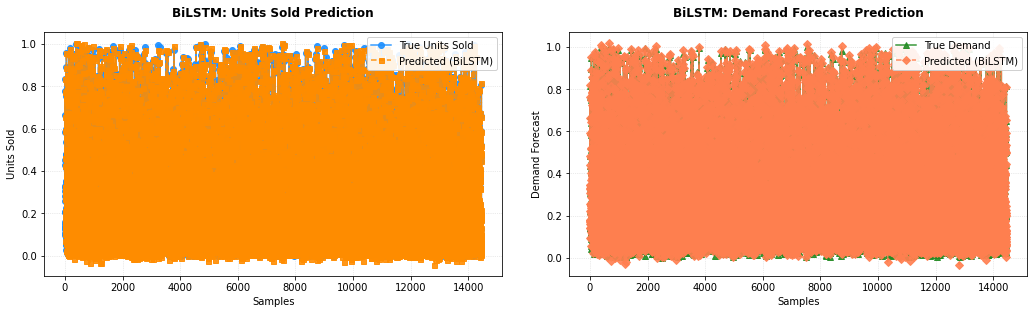

In [228]:
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 2, 1)
plt.plot(Yt_test['Units Sold'].values, label='True Units Sold', color='dodgerblue', linestyle='-', marker='o', markersize=6, alpha=0.9)  
plt.plot(y_pred_bilstm[:, 0], label='Predicted (BiLSTM)', color='darkorange', linestyle='--', marker='s', markersize=5, alpha=0.9)  
plt.title('BiLSTM: Units Sold Prediction', fontweight='bold', pad=15)
plt.xlabel('Samples', fontsize=10)
plt.ylabel('Units Sold', fontsize=10)
plt.legend(framealpha=0.9, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.7, alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(Yt_test['Demand Forecast'].values, label='True Demand', color='forestgreen', linestyle='-', marker='^', markersize=6, alpha=0.9) 
plt.plot(y_pred_bilstm[:, 1], label='Predicted (BiLSTM)', color='coral', linestyle='--', marker='D', markersize=5, alpha=0.9)  
plt.title('BiLSTM: Demand Forecast Prediction', fontweight='bold', pad=15)
plt.xlabel('Samples', fontsize=10)
plt.ylabel('Demand Forecast', fontsize=10)
plt.legend(framealpha=0.9, loc='upper right')
plt.grid(True, linestyle=':', linewidth=0.7, alpha=0.5)

plt.tight_layout(pad=3.0)
plt.show()

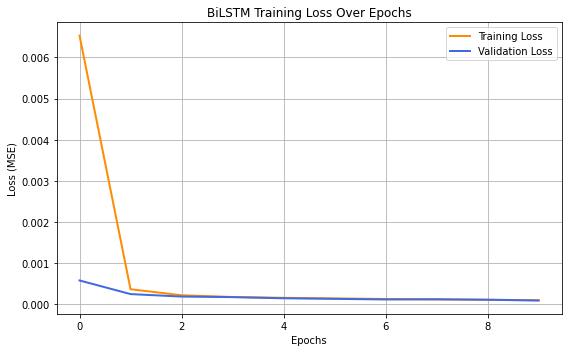

In [229]:
plt.figure(figsize=(8, 5))
plt.plot(history_bilstm.history['loss'], label='Training Loss', color='darkorange', linewidth=2)
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss' ,color='royalblue', linewidth=2)
plt.title('BiLSTM Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

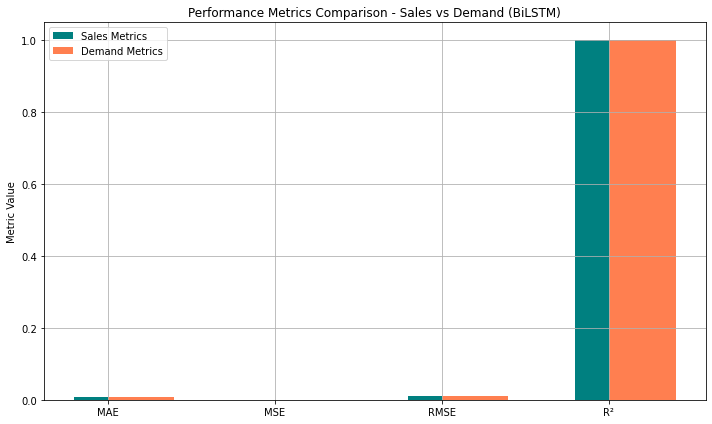

In [230]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
sales_metrics = [mae_bilstm_sales, mse_bilstm_sales, rmse_bilstm_sales, r2_bilstm_sales]
demand_metrics = [mae_bilstm_demand, mse_bilstm_demand, rmse_bilstm_demand, r2_bilstm_demand]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, sales_metrics, width=0.4, label='Sales Metrics', color='teal', align='center')
plt.bar(x, demand_metrics, width=0.4, label='Demand Metrics', color='coral', align='edge')
plt.xticks(x, metrics)
plt.title('Performance Metrics Comparison - Sales vs Demand (BiLSTM)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# LSTM+CNN

In [231]:
X_train_seq = Xf_train.values.reshape((Xf_train.shape[0], 1, Xf_train.shape[1]))
X_test_seq = Xf_test.values.reshape((Xf_test.shape[0], 1, Xf_test.shape[1]))

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_cnn_lstm.add(MaxPooling1D(pool_size=1))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(2)) 
model_cnn_lstm.compile(optimizer='adam', loss='mse')

In [233]:
history_cnn_lstm = model_cnn_lstm.fit(X_train_seq, Yt_train.values, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
1627/1627 [==============================] - 15s 7ms/step - loss: 0.0048 - val_loss: 2.4414e-04
Epoch 2/20
1627/1627 [==============================] - 10s 6ms/step - loss: 2.0460e-04 - val_loss: 1.7546e-04
Epoch 3/20
1627/1627 [==============================] - 9s 6ms/step - loss: 1.6971e-04 - val_loss: 1.6038e-04
Epoch 4/20
1627/1627 [==============================] - 9s 6ms/step - loss: 1.5629e-04 - val_loss: 1.3825e-04
Epoch 5/20
1627/1627 [==============================] - 9s 6ms/step - loss: 1.4530e-04 - val_loss: 1.3219e-04
Epoch 6/20
1627/1627 [==============================] - 9s 6ms/step - loss: 1.3791e-04 - val_loss: 1.2129e-04
Epoch 7/20
1627/1627 [==============================] - 9s 6ms/step - loss: 1.2326e-04 - val_loss: 1.0655e-04
Epoch 8/20
1627/1627 [==============================] - 9s 6ms/step - loss: 1.1035e-04 - val_loss: 1.0206e-04
Epoch 9/20
1627/1627 [==============================] - 9s 6ms/step - loss: 9.5235e-05 - val_loss: 8.0946e-05
Epoch 10/20


In [234]:
y_pred_cnn_lstm = model_cnn_lstm.predict(X_test_seq)

452/452 [==============================] - 2s 4ms/step


In [235]:
mae_cnnlstm_sales = mean_absolute_error(Yt_test['Units Sold'], y_pred_cnn_lstm[:, 0])
mse_cnnlstm_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_cnn_lstm[:, 0])
rmse_cnnlstm_sales = np.sqrt(mse_cnnlstm_sales)
r2_cnnlstm_sales = r2_score(Yt_test['Units Sold'], y_pred_cnn_lstm[:, 0])

mae_cnnlstm_demand = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_cnn_lstm[:, 1])
mse_cnnlstm_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_cnn_lstm[:, 1])
rmse_cnnlstm_demand = np.sqrt(mse_cnnlstm_demand)
r2_cnnlstm_demand = r2_score(Yt_test['Demand Forecast'], y_pred_cnn_lstm[:, 1])

print(f"CNN+LSTM - Sales Prediction: MAE: {mae_cnnlstm_sales}, MSE: {mse_cnnlstm_sales}, RMSE: {rmse_cnnlstm_sales}, R²: {r2_cnnlstm_sales}")
print(f"CNN+LSTM - Demand Forecast Prediction: MAE: {mae_cnnlstm_demand}, MSE: {mse_cnnlstm_demand}, RMSE: {rmse_cnnlstm_demand}, R²: {r2_cnnlstm_demand}")

CNN+LSTM - Sales Prediction: MAE: 0.005215862776369583, MSE: 5.805641518835989e-05, RMSE: 0.007619476044214582, R²: 0.9989895059842573
CNN+LSTM - Demand Forecast Prediction: MAE: 0.004745209972152579, MSE: 4.7535203484310644e-05, RMSE: 0.006894577832203408, R²: 0.9991156888703299


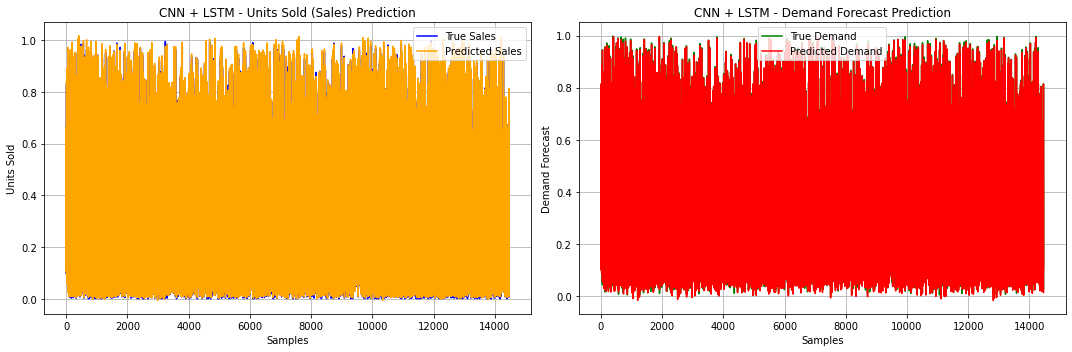

In [236]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(Yt_test['Units Sold'].values, label='True Sales', color='blue')
plt.plot(y_pred_cnn_lstm[:, 0], label='Predicted Sales', color='orange')
plt.title('CNN + LSTM - Units Sold (Sales) Prediction')
plt.xlabel('Samples')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(Yt_test['Demand Forecast'].values, label='True Demand', color='green')
plt.plot(y_pred_cnn_lstm[:, 1], label='Predicted Demand', color='red')
plt.title('CNN + LSTM - Demand Forecast Prediction')
plt.xlabel('Samples')
plt.ylabel('Demand Forecast')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

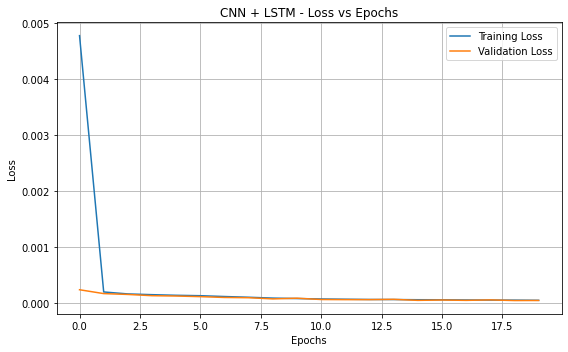

In [237]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn_lstm.history['loss'], label='Training Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.title('CNN + LSTM - Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

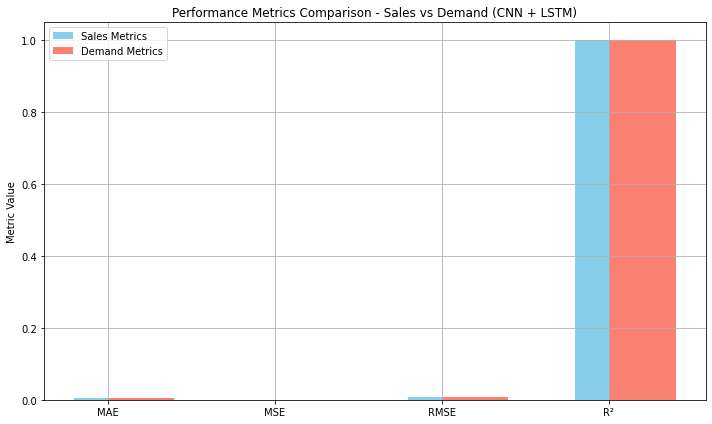

In [238]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
sales_metrics = [mae_cnnlstm_sales, mse_cnnlstm_sales, rmse_cnnlstm_sales, r2_cnnlstm_sales]
demand_metrics = [mae_cnnlstm_demand, mse_cnnlstm_demand, rmse_cnnlstm_demand, r2_cnnlstm_demand]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, sales_metrics, width=0.4, label='Sales Metrics', color='skyblue', align='center')
plt.bar(x, demand_metrics, width=0.4, label='Demand Metrics', color='salmon', align='edge')
plt.xticks(x, metrics)
plt.title('Performance Metrics Comparison - Sales vs Demand (CNN + LSTM)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# BiLSTM+CNN

In [239]:
X_bilstm_cnn_train = Xf_train.values.reshape((Xf_train.shape[0], 1, Xf_train.shape[1]))
X_bilstm_cnn_test = Xf_test.values.reshape((Xf_test.shape[0], 1, Xf_test.shape[1]))

In [240]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, Dense, Flatten

input_layer = Input(shape=(X_bilstm_cnn_train.shape[1], X_bilstm_cnn_train.shape[2]))
cnn = Conv1D(filters=64, kernel_size=1, activation='relu')(input_layer)
bilstm = Bidirectional(LSTM(units=64, activation='relu'))(cnn)
output = Dense(2)(bilstm)
bilstm_cnn_model = Model(inputs=input_layer, outputs=output)
bilstm_cnn_model.compile(optimizer='adam', loss='mse')

In [241]:
history_bilstm_cnn = bilstm_cnn_model.fit(X_bilstm_cnn_train, Yt_train.values, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
1627/1627 [==============================] - 26s 11ms/step - loss: 0.0029 - val_loss: 2.0538e-04
Epoch 2/20
1627/1627 [==============================] - 18s 11ms/step - loss: 1.7382e-04 - val_loss: 1.4557e-04
Epoch 3/20
1627/1627 [==============================] - 19s 12ms/step - loss: 1.4681e-04 - val_loss: 1.2242e-04
Epoch 4/20
1627/1627 [==============================] - 19s 12ms/step - loss: 1.2691e-04 - val_loss: 9.3563e-05
Epoch 5/20
1627/1627 [==============================] - 18s 11ms/step - loss: 1.0721e-04 - val_loss: 9.5458e-05
Epoch 6/20
1627/1627 [==============================] - 17s 11ms/step - loss: 9.2762e-05 - val_loss: 7.1100e-05
Epoch 7/20
1627/1627 [==============================] - 18s 11ms/step - loss: 8.3404e-05 - val_loss: 7.0498e-05
Epoch 8/20
1627/1627 [==============================] - 19s 12ms/step - loss: 7.7244e-05 - val_loss: 7.7093e-05
Epoch 9/20
1627/1627 [==============================] - 18s 11ms/step - loss: 7.2710e-05 - val_loss: 5.8399e

In [242]:
y_pred_bilstm_cnn = bilstm_cnn_model.predict(X_bilstm_cnn_test)

452/452 [==============================] - 3s 5ms/step


In [243]:
mae_bilstm_cnn_sales = mean_absolute_error(Yt_test['Units Sold'], y_pred_bilstm_cnn[:, 0])
mse_bilstm_cnn_sales = mean_squared_error(Yt_test['Units Sold'], y_pred_bilstm_cnn[:, 0])
rmse_bilstm_cnn_sales = np.sqrt(mse_bilstm_cnn_sales)
r2_bilstm_cnn_sales = r2_score(Yt_test['Units Sold'], y_pred_bilstm_cnn[:, 0])

mae_bilstm_cnn_demand = mean_absolute_error(Yt_test['Demand Forecast'], y_pred_bilstm_cnn[:, 1])
mse_bilstm_cnn_demand = mean_squared_error(Yt_test['Demand Forecast'], y_pred_bilstm_cnn[:, 1])
rmse_bilstm_cnn_demand = np.sqrt(mse_bilstm_cnn_demand)
r2_bilstm_cnn_demand = r2_score(Yt_test['Demand Forecast'], y_pred_bilstm_cnn[:, 1])

print(f"BiLSTM+CNN - Sales Prediction: MAE: {mae_bilstm_cnn_sales}, MSE: {mse_bilstm_cnn_sales}, RMSE: {rmse_bilstm_cnn_sales}, R²: {r2_bilstm_cnn_sales}")
print(f"BiLSTM+CNN - Demand Forecast Prediction: MAE: {mae_bilstm_cnn_demand}, MSE: {mse_bilstm_cnn_demand}, RMSE: {rmse_bilstm_cnn_demand}, R²: {r2_bilstm_cnn_demand}")

BiLSTM+CNN - Sales Prediction: MAE: 0.00439750122357607, MSE: 4.412690824672686e-05, RMSE: 0.006642808761866238, R²: 0.9992319543572941
BiLSTM+CNN - Demand Forecast Prediction: MAE: 0.0035534256860512343, MSE: 2.8416707701010235e-05, RMSE: 0.005330732379421259, R²: 0.9994713557732664


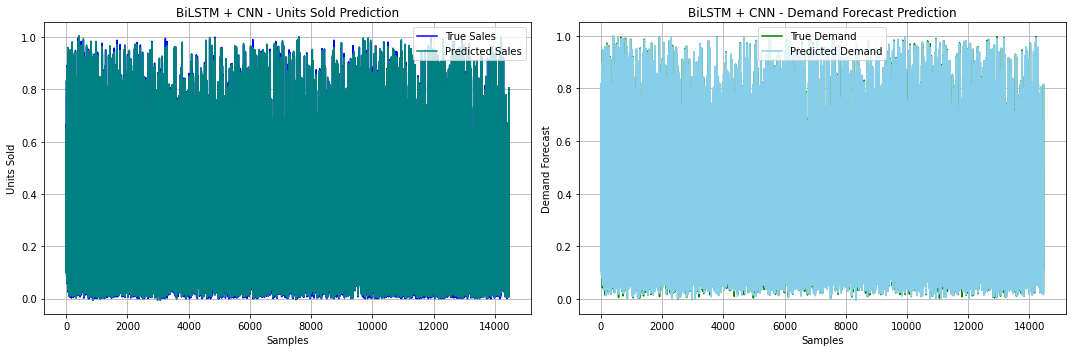

In [244]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(Yt_test['Units Sold'].values, label='True Sales', color='blue')
plt.plot(y_pred_bilstm_cnn[:, 0], label='Predicted Sales', color='teal')
plt.title('BiLSTM + CNN - Units Sold Prediction')
plt.xlabel('Samples')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(Yt_test['Demand Forecast'].values, label='True Demand', color='green')
plt.plot(y_pred_bilstm_cnn[:, 1], label='Predicted Demand', color='skyblue')
plt.title('BiLSTM + CNN - Demand Forecast Prediction')
plt.xlabel('Samples')
plt.ylabel('Demand Forecast')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

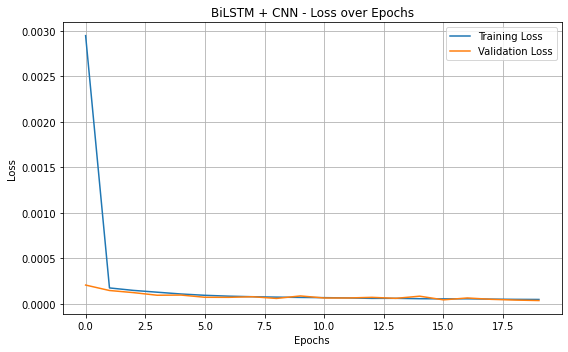

In [245]:
plt.figure(figsize=(8, 5))
plt.plot(history_bilstm_cnn.history['loss'], label='Training Loss')
plt.plot(history_bilstm_cnn.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM + CNN - Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

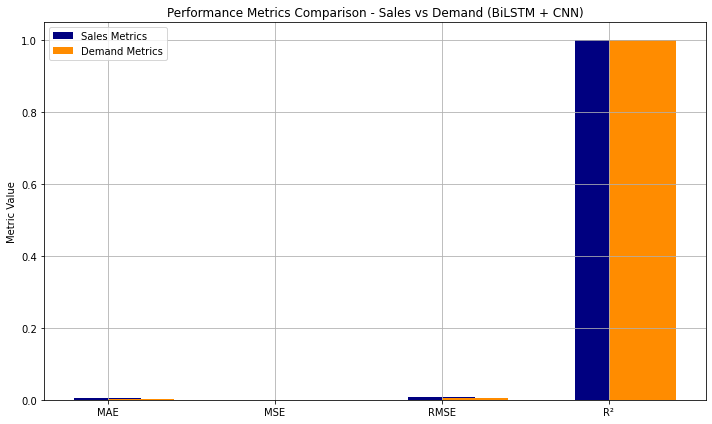

In [246]:
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
sales_metrics = [mae_bilstm_cnn_sales, mse_bilstm_cnn_sales, rmse_bilstm_cnn_sales, r2_bilstm_cnn_sales]
demand_metrics = [mae_bilstm_cnn_demand, mse_bilstm_cnn_demand, rmse_bilstm_cnn_demand, r2_bilstm_cnn_demand]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, sales_metrics, width=0.4, label='Sales Metrics', color='navy', align='center')
plt.bar(x, demand_metrics, width=0.4, label='Demand Metrics', color='darkorange', align='edge')
plt.xticks(x, metrics)
plt.title('Performance Metrics Comparison - Sales vs Demand (BiLSTM + CNN)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ARIMA

In [247]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

target_units = 'Units Sold'

train_units = df_no_outliers[target_units].iloc[:-30]
test_units = df_no_outliers[target_units].iloc[-30:]

model_units = auto_arima(train_units, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=45.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=68686.082, Time=4.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=33748.899, Time=2.65 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=49693.273, Time=5.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=22432.588, Time=3.69 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=16626.988, Time=4.17 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=13059.227, Time=6.31 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=10710.390, Time=6.66 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=96.17 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=71.02 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1116.530, Time=14.88 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1118.469, Time=11.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1120.096, Time=9.55 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1122.085, Time=8.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercep

In [248]:
model_fit_units = ARIMA(train_units, order=model_units.order).fit()

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [249]:
forecast_units_sold = model_fit_units.forecast(steps=len(test_units))

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [250]:
target_demand = 'Demand Forecast'
train_demand = df_no_outliers[target_demand].iloc[:-30]
test_demand = df_no_outliers[target_demand].iloc[-30:]

model_demand = auto_arima(train_demand, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=50.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=73693.593, Time=4.73 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=31180.419, Time=3.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=51381.377, Time=5.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=18688.181, Time=3.84 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=12480.651, Time=5.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=8729.198, Time=5.31 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=6286.437, Time=6.69 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=80.26 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=61.54 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-5771.126, Time=14.00 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-5773.093, Time=11.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-5774.734, Time=9.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-5776.724, Time=8.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept 

In [251]:
model_fit_demand = ARIMA(train_demand, order=model_demand.order).fit()

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [252]:
forecast_demand = model_fit_demand.forecast(steps=len(test_demand))

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [253]:
true_units = np.array(test_units)
pred_units = np.array(forecast_units_sold)

true_demand = np.array(test_demand)
pred_demand = np.array(forecast_demand)

mae_units = mean_absolute_error(true_units, pred_units)
rmse_units = np.sqrt(mean_squared_error(true_units, pred_units))
mape_units = np.mean(np.abs((true_units - pred_units) / true_units)) * 100

mae_demand = mean_absolute_error(true_demand, pred_demand)
rmse_demand = np.sqrt(mean_squared_error(true_demand, pred_demand))
mape_demand = np.mean(np.abs((true_demand - pred_demand) / true_demand)) * 100

print("=====  Units Sold =====")
print(f"MAE  : {mae_units:.2f}")
print(f"RMSE : {rmse_units:.2f}")
print(f"MAPE : {mape_units:.2f}%")

print("\n=====  Demand Forecast =====")
print(f"MAE  : {mae_demand:.2f}")
print(f"RMSE : {rmse_demand:.2f}")
print(f"MAPE : {mape_demand:.2f}%")

=====  Units Sold =====
MAE  : 0.23
RMSE : 0.26
MAPE : 531.04%

=====  Demand Forecast =====
MAE  : 0.22
RMSE : 0.25
MAPE : 332.67%


In [289]:
print(true_units[:10])
print(true_demand[:10])

[0.0921659  0.60829493 0.04147465 0.05990783 0.21428571 0.10599078
 0.2235023  0.84331797 0.67050691 0.08294931]
[0.14135101 0.62392402 0.08271981 0.11879713 0.27042416 0.13723615
 0.26457439 0.84966303 0.68524656 0.1443315 ]


## Why is MAPE very high (over 100%)?
### Reason:
MAPE is very sensitive to small values in the true data.
The formula for MAPE is:

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i^{\text{true}} - y_i^{\text{pred}}}{y_i^{\text{true}}} \right| \times 100
$$

When the true values are small (close to zero), even a small error in prediction can result in a very large percentage error, which is why MAPE can exceed 100%.


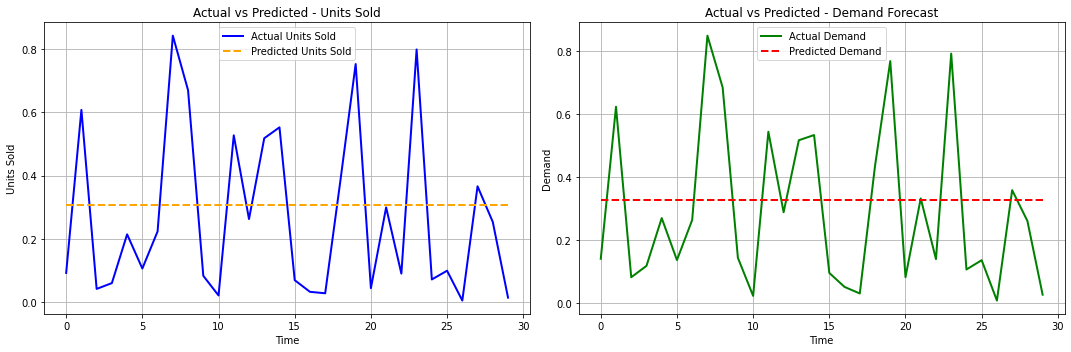

In [255]:
x = np.arange(len(true_units))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x, true_units, label='Actual Units Sold', color='blue', linewidth=2)
plt.plot(x, pred_units, label='Predicted Units Sold', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted - Units Sold')
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, true_demand, label='Actual Demand', color='green', linewidth=2)
plt.plot(x, pred_demand, label='Predicted Demand', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted - Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-256-f506a7534746>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


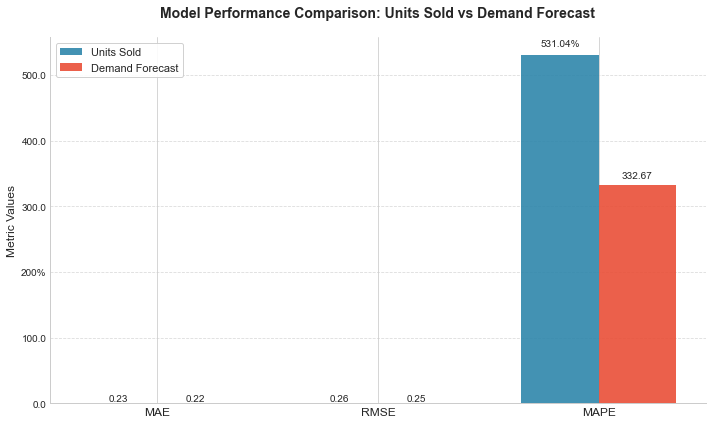

In [256]:
metrics = ['MAE', 'RMSE', 'MAPE']
units_values = [mae_units, rmse_units, mape_units]
demand_values = [mae_demand, rmse_demand, mape_demand]

plt.style.use('seaborn-whitegrid')
colors = ['#2e86ab', '#e94f37'] 
bar_width = 0.35
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))

units_bars = ax.bar(x - bar_width/2, units_values, bar_width, 
                   label='Units Sold', color=colors[0], alpha=0.9)
demand_bars = ax.bar(x + bar_width/2, demand_values, bar_width, 
                    label='Demand Forecast', color=colors[1], alpha=0.9)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height*1.02,
                f'{height:.2f}{"%" if bar in units_bars[2:] else ""}',
                ha='center', va='bottom', fontsize=10)

add_labels(units_bars)
add_labels(demand_bars)

ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.set_title('Model Performance Comparison: Units Sold vs Demand Forecast', 
             fontsize=14, pad=20, fontweight='bold')

def format_y_axis(x, pos):
    return f'{x:.0f}%' if pos == 2 else f'{x:.1f}'

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

ax.legend(frameon=True, framealpha=0.9, fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

# SARIMAX

In [257]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

train_units = df_no_outliers['Units Sold'].iloc[:-30]
test_units = df_no_outliers['Units Sold'].iloc[-30:]

In [258]:
model_units_sarima = auto_arima(train_units, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=492.14 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1125.251, Time=20.64 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1121.392, Time=139.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1121.393, Time=47.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=68686.082, Time=5.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-1123.360, Time=52.68 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-1123.360, Time=29.99 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=250.85 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-1123.283, Time=6.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-1123.283, Time=10.54 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-1121.281, Time=9.43 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1064.575 seconds


In [259]:
sarima_model_units = SARIMAX(train_units, order=model_units_sarima.order, seasonal_order=model_units_sarima.seasonal_order).fit()

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [260]:
forecast_units_sold_sarima = sarima_model_units.forecast(steps=len(test_units))

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [261]:
train_demand = df_no_outliers['Demand Forecast'].iloc[:-30]
test_demand = df_no_outliers['Demand Forecast'].iloc[-30:]

In [262]:
model_demand_sarima = auto_arima(train_demand, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=436.40 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-5779.977, Time=11.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-5776.108, Time=107.93 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-5776.108, Time=43.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=73693.593, Time=7.24 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-5778.091, Time=50.68 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-5778.091, Time=26.35 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=258.53 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-5777.994, Time=6.59 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-5777.994, Time=11.64 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-5775.993, Time=26.57 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 987.023 seconds


In [263]:
sarima_model_demand = SARIMAX(train_demand, order=model_demand_sarima.order, seasonal_order=model_demand_sarima.seasonal_order).fit() 

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [264]:
forecast_demand_sarima = sarima_model_demand.forecast(steps=len(test_demand))

C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Right-click\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [265]:
true_units = np.array(test_units.reset_index(drop=True))
pred_units = np.array(forecast_units_sold_sarima.reset_index(drop=True))

true_demand = np.array(test_demand.reset_index(drop=True))
pred_demand = np.array(forecast_demand_sarima.reset_index(drop=True))

mae_units = mean_absolute_error(true_units, pred_units)
rmse_units = mean_squared_error(true_units, pred_units, squared=False)
mape_units = np.mean(np.abs((true_units - pred_units) / true_units)) * 100

mae_demand = mean_absolute_error(true_demand, pred_demand)
rmse_demand = mean_squared_error(true_demand, pred_demand, squared=False)
mape_demand = np.mean(np.abs((true_demand - pred_demand) / true_demand)) * 100

print("=====  Units Sold =====")
print(f"MAE  : {mae_units:.2f}")
print(f"RMSE : {rmse_units:.2f}")
print(f"MAPE : {mape_units:.2f}%")

print("\n=====  Demand Forecast =====")
print(f"MAE  : {mae_demand:.2f}")
print(f"RMSE : {rmse_demand:.2f}")
print(f"MAPE : {mape_demand:.2f}%")


=====  Units Sold =====
MAE  : 0.27
RMSE : 0.38
MAPE : 100.00%

=====  Demand Forecast =====
MAE  : 0.30
RMSE : 0.39
MAPE : 100.00%


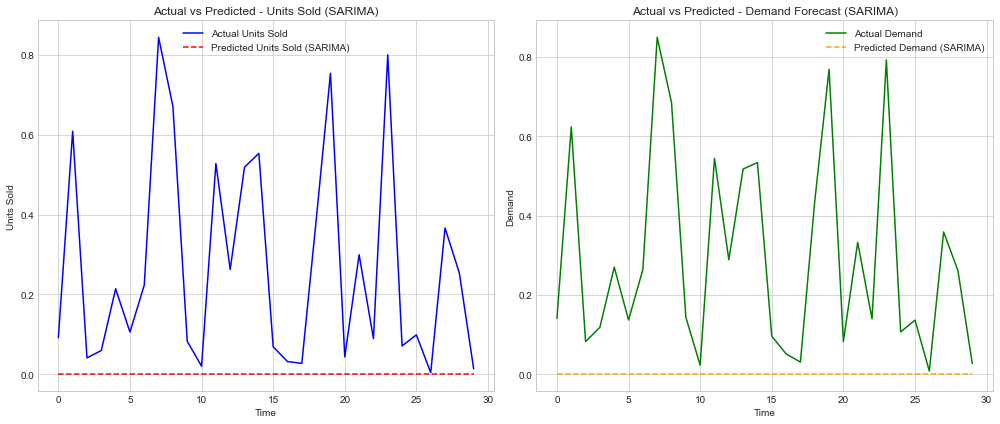

In [266]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(test_units.reset_index(drop=True), label='Actual Units Sold', color='blue')
plt.plot(forecast_units_sold_sarima.reset_index(drop=True), label='Predicted Units Sold (SARIMA)', color='red', linestyle='--')
plt.title('Actual vs Predicted - Units Sold (SARIMA)')
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(test_demand.reset_index(drop=True), label='Actual Demand', color='green')
plt.plot(forecast_demand_sarima.reset_index(drop=True), label='Predicted Demand (SARIMA)', color='orange', linestyle='--')
plt.title('Actual vs Predicted - Demand Forecast (SARIMA)')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)

plt.tight_layout()  
plt.show()

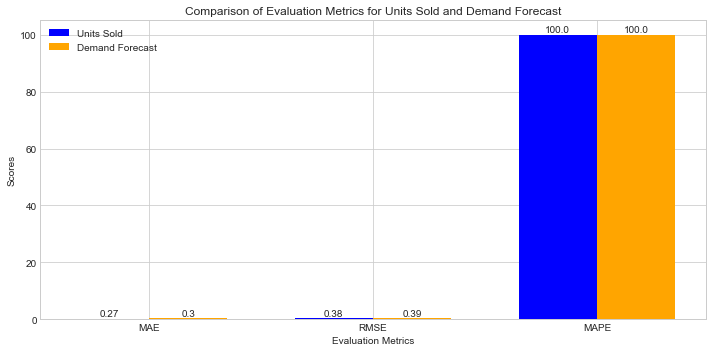

In [267]:
labels = ['MAE', 'RMSE', 'MAPE']
units_values = [mae_units, rmse_units, mape_units]
demand_values = [mae_demand, rmse_demand, mape_demand]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 5))

bars_units = ax.bar(x - width/2, units_values, width, label='Units Sold', color='blue')
bars_demand = ax.bar(x + width/2, demand_values, width, label='Demand Forecast', color='orange')

ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics for Units Sold and Demand Forecast')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

add_labels(bars_units)
add_labels(bars_demand)

plt.tight_layout()
plt.show()

# Prophet

In [268]:
from prophet import Prophet

df_time = df_no_outliers.copy()
if df_time.index.name == 'Date' and 'Date' in df_time.columns:
    df_time = df_time.reset_index(drop=True) 
elif df_time.index.name == 'Date':
    df_time = df_time.reset_index() 
elif 'Date' in df_time.columns:
    pass 
else:
    raise ValueError("No column or index named 'Date' in data")

In [269]:
df_time['Date'] = pd.to_datetime(df_time['Date'])

In [270]:
df_agg = df_time.groupby('Date').agg({
    'Units Sold': 'sum',
    'Demand Forecast': 'sum',
    'Inventory Level': 'mean',
    'Price': 'mean',
    'Seasonality_Summer': 'max',
    'Inventory_Demand': 'mean',
    'UnitsSold_Price': 'mean'
}).reset_index()

In [271]:
df_agg = df_agg.sort_values('Date')

In [272]:
train_size = int(0.8 * len(df_agg))
train_data = df_agg.iloc[:train_size]
test_data = df_agg.iloc[train_size:]

In [273]:
model_units = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_units.add_regressor('Inventory Level')
model_units.add_regressor('Price')
model_units.add_regressor('Seasonality_Summer')
model_units.add_regressor('Inventory_Demand')
model_units.add_regressor('UnitsSold_Price')

In [274]:
train_units = train_data[['Date', 'Units Sold']].rename(columns={'Date': 'ds', 'Units Sold': 'y'})
for col in ['Inventory Level', 'Price', 'Seasonality_Summer', 'Inventory_Demand', 'UnitsSold_Price']:
    train_units[col] = train_data[col].values

model_units.fit(train_units)

18:22:26 - cmdstanpy - INFO - Chain [1] start processing
18:22:28 - cmdstanpy - INFO - Chain [1] done processing


In [275]:
future_units = model_units.make_future_dataframe(periods=len(test_data), include_history=True)
future_units = future_units.merge(df_agg.drop(['Units Sold', 'Demand Forecast'], axis=1), 
                                left_on='ds', right_on='Date', how='left')
future_units.drop('Date', axis=1, inplace=True)

In [276]:
future_units.fillna(method='ffill', inplace=True)

forecast_units = model_units.predict(future_units)

In [277]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,  
    r2_score
)

y_true = test_data['Units Sold'].values
y_pred = forecast_units.iloc[train_size:]['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R2 Score: {r2:.4f}")

MAE: 0.5447
RMSE: 0.7021
MAPE: 1.79%
R2 Score: 0.9006


In [278]:
model_demand = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_demand.add_regressor('Inventory Level')
model_demand.add_regressor('Price')
model_demand.add_regressor('Seasonality_Summer')
model_demand.add_regressor('Inventory_Demand')
model_demand.add_regressor('UnitsSold_Price')

train_demand = train_data[['Date', 'Demand Forecast']].rename(columns={'Date': 'ds', 'Demand Forecast': 'y'})
for col in ['Inventory Level', 'Price', 'Seasonality_Summer', 'Inventory_Demand', 'UnitsSold_Price']:
    train_demand[col] = train_data[col].values

model_demand.fit(train_demand)

18:22:29 - cmdstanpy - INFO - Chain [1] start processing
18:22:30 - cmdstanpy - INFO - Chain [1] done processing


In [279]:
forecast_demand = model_demand.predict(future_units)

In [280]:
y_true_demand = test_data['Demand Forecast'].values
y_pred_demand = forecast_demand.iloc[train_size:]['yhat'].values

mae_demand = mean_absolute_error(y_true_demand, y_pred_demand)
rmse_demand = np.sqrt(mean_squared_error(y_true_demand, y_pred_demand))
mape_demand = np.mean(np.abs((y_true_demand - y_pred_demand) / y_true_demand)) * 100
r2_demand = r2_score(y_true_demand, y_pred_demand)

print(f"MAE: {mae_demand:.4f}")
print(f"RMSE: {rmse_demand:.4f}")
print(f"MAPE: {mape_demand:.2f}%")
print(f"R2 Score: {r2_demand:.4f}")

MAE: 0.5346
RMSE: 0.6698
MAPE: 1.64%
R2 Score: 0.9041


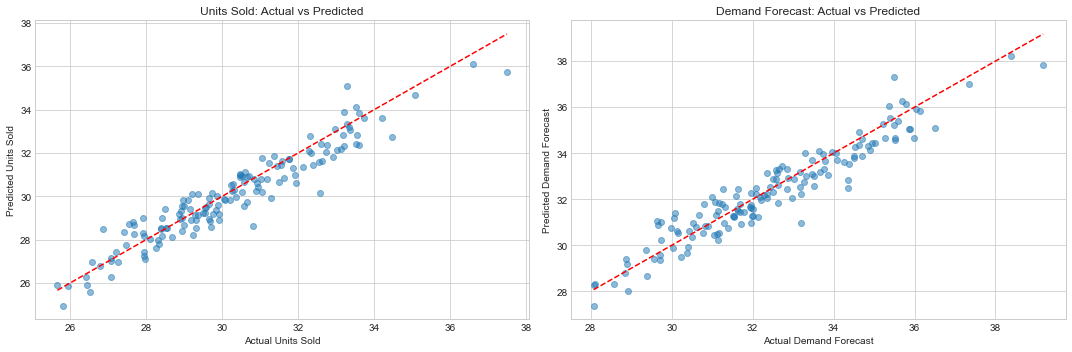

In [281]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(test_data['Units Sold'], forecast_units.iloc[train_size:]['yhat'], alpha=0.5)
plt.plot([min(test_data['Units Sold']), max(test_data['Units Sold'])], 
         [min(test_data['Units Sold']), max(test_data['Units Sold'])], 'r--')
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('Units Sold: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(test_data['Demand Forecast'], forecast_demand.iloc[train_size:]['yhat'], alpha=0.5)
plt.plot([min(test_data['Demand Forecast']), max(test_data['Demand Forecast'])], 
         [min(test_data['Demand Forecast']), max(test_data['Demand Forecast'])], 'r--')
plt.xlabel('Actual Demand Forecast')
plt.ylabel('Predicted Demand Forecast')
plt.title('Demand Forecast: Actual vs Predicted')

plt.tight_layout()
plt.show()

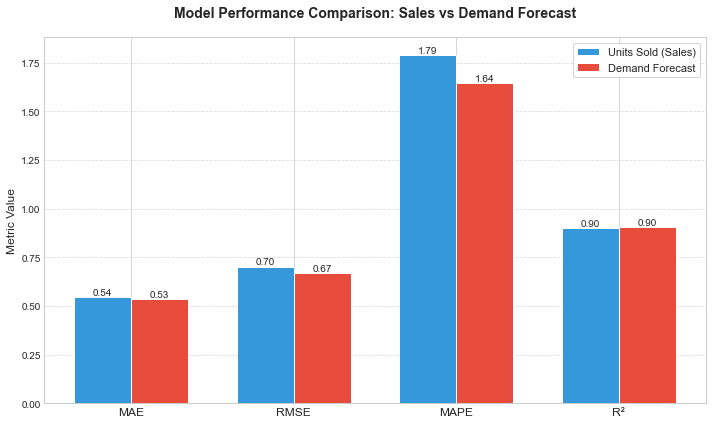

In [282]:
sales_metrics = {
    'MAE': mae,
    'RMSE': rmse,
    'MAPE': mape,
    'R²': r2
}

demand_metrics = {
    'MAE': mae_demand,
    'RMSE': rmse_demand,
    'MAPE': mape_demand,
    'R²': r2_demand
}

colors = {
    'sales': '#3498db',  
    'demand': '#e74c3c'  
}

plt.figure(figsize=(10, 6))

x = np.arange(len(sales_metrics))
width = 0.35

sales_bars = plt.bar(x - width/2, sales_metrics.values(), width, 
                    label='Units Sold (Sales)', color=colors['sales'],
                    edgecolor='white', linewidth=1)

demand_bars = plt.bar(x + width/2, demand_metrics.values(), width, 
                     label='Demand Forecast', color=colors['demand'],
                     edgecolor='white', linewidth=1)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}' if isinstance(height, float) else f'{height}',
                ha='center', va='bottom', fontsize=10)

add_labels(sales_bars)
add_labels(demand_bars)

plt.xticks(x, sales_metrics.keys(), fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.title('Model Performance Comparison: Sales vs Demand Forecast', 
          fontsize=14, pad=20, fontweight='bold')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(
    lambda x, loc: "{:.0f}%".format(x) if x in [mape, mape_demand] else "{:.2f}".format(x)))

plt.legend(frameon=True, framealpha=0.9, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Comparison between machine learning, deep learning and time series models

In [283]:
metrics_comparison = {
    "Model": [
        "XGBRegressor - Units Sold", "XGBRegressor - Demand Forecast",
        "RandomForestRegressor - Units Sold", "RandomForestRegressor - Demand Forecast",
        "GradientBoostingRegressor - Units Sold", "GradientBoostingRegressor - Demand Forecast",
        "SVR - Units Sold", "SVR - Demand Forecast",
        "Ridge Regression - Units Sold", "Ridge Regression - Demand Forecast",
        "LSTM - Sales Prediction", "LSTM - Demand Forecast Prediction",
        "MLP - Sales Prediction", "MLP - Demand Forecast Prediction",
        "CNN - Sales Prediction", "CNN - Demand Forecast Prediction",
        "BiLSTM - Sales Prediction", "BiLSTM - Demand Forecast Prediction",
        "CNN+LSTM - Sales Prediction", "CNN+LSTM - Demand Forecast Prediction",
        "BiLSTM+CNN - Sales Prediction", "BiLSTM+CNN - Demand Forecast Prediction"
    ],
    
    "MAE": [
        mae_units_sold, mae_demand_forecast,
        mae_units_sold_rf, mae_demand_forecast_rf,
        mae_units_sold_gb, mae_demand_forecast_gb,
        mae_units_sold_svr, mae_demand_forecast_svr,
        mae_units_sold_ridge, mae_demand_forecast_ridge,
        mae_lstm_sales, mae_lstm_demand,
        mae_mlp_sales, mae_mlp_demand,
        mae_cnn_sales, mae_cnn_demand,
        mae_bilstm_sales, mae_bilstm_demand,
        mae_cnnlstm_sales, mae_cnnlstm_demand,
        mae_bilstm_cnn_sales, mae_bilstm_cnn_demand
    ],
    
    "MSE": [
        mse_units_sold, mse_demand_forecast,
        mse_units_sold_rf, mse_demand_forecast_rf,
        mse_units_sold_gb, mse_demand_forecast_gb,
        mse_units_sold_svr, mse_demand_forecast_svr,
        mse_units_sold_ridge, mse_demand_forecast_ridge,
        mse_lstm_sales, mse_lstm_demand,
        mse_mlp_sales, mse_mlp_demand,
        mse_cnn_sales, mse_cnn_demand,
        mse_bilstm_sales, mse_bilstm_demand,
        mse_cnnlstm_sales, mse_cnnlstm_demand,
        mse_bilstm_cnn_sales, mse_bilstm_cnn_demand
    ],
    
    "RMSE": [
        rmse_units_sold, rmse_demand_forecast,
        rmse_units_sold_rf, rmse_demand_forecast_rf,
        rmse_units_sold_gb, rmse_demand_forecast_gb,
        rmse_units_sold_svr, rmse_demand_forecast_svr,
        rmse_units_sold_ridge, rmse_demand_forecast_ridge,
        rmse_lstm_sales, rmse_lstm_demand,
        rmse_mlp_sales, rmse_mlp_demand,
        rmse_cnn_sales, rmse_cnn_demand,
        rmse_bilstm_sales, rmse_bilstm_demand,
        rmse_cnnlstm_sales, rmse_cnnlstm_demand,
        rmse_bilstm_cnn_sales, rmse_bilstm_cnn_demand
    ],
    
    "R²": [
        r2_units_sold, r2_demand_forecast,
        r2_units_sold_rf, r2_demand_forecast_rf,
        r2_units_sold_gb, r2_demand_forecast_gb,
        r2_units_sold_svr, r2_demand_forecast_svr,
        r2_units_sold_ridge, r2_demand_forecast_ridge,
        r2_lstm_sales, r2_lstm_demand,
        r2_mlp_sales, r2_mlp_demand,
        r2_cnn_sales, r2_cnn_demand,
        r2_bilstm_sales, r2_bilstm_demand,
        r2_cnnlstm_sales, r2_cnnlstm_demand,
        r2_bilstm_cnn_sales, r2_bilstm_cnn_demand
    ]
}

comparison_df = pd.DataFrame(metrics_comparison)

comparison_df

,Model,MAE,MSE,RMSE,R²
0,XGBRegressor - Units Sold,0.010032,0.000182,0.013499,0.996828
1,XGBRegressor - Demand Forecast,0.005243,0.000048,0.006956,0.999100
2,RandomForestRegressor - Units Sold,0.011052,0.000252,0.015873,0.995615
3,RandomForestRegressor - Demand Forecast,0.005330,0.000086,0.009290,0.998394
4,GradientBoostingRegressor - Units Sold,0.017715,0.000521,0.022816,0.990939
5,GradientBoostingRegressor - Demand Forecast,0.014542,0.000356,0.018869,0.993376
6,SVR - Units Sold,0.035783,0.001837,0.042859,0.968028
7,SVR - Demand Forecast,0.041026,0.002261,0.047546,0.957944
8,Ridge Regression - Units Sold,0.051181,0.004280,0.065423,0.925503
9,Ridge Regression - Demand Forecast,0.049260,0.004007,0.063302,0.925455


In [284]:
comparison_dict = {
    "Model": ["Prophet - Units Sold", "Prophet - Demand Forecast",
              "ARIMA - Units Sold", "ARIMA - Demand Forecast",
              "SARIMAX - Units Sold", "SARIMAX - Demand Forecast"],
    
    "MAE": [mae, mae_demand, mae_units, mae_demand, mae_units, mae_demand],
    "RMSE": [rmse, rmse_demand, rmse_units, rmse_demand, rmse_units, rmse_demand],
    "MAPE": [mape, mape_demand, mape_units, mape_demand, mape_units, mape_demand],

}

comparison_df = pd.DataFrame(comparison_dict)

print(comparison_df)

                       Model       MAE      RMSE        MAPE
0       Prophet - Units Sold  0.544699  0.702106    1.790408
1  Prophet - Demand Forecast  0.534601  0.669758    1.644707
2         ARIMA - Units Sold  0.271121  0.376648  100.000000
3    ARIMA - Demand Forecast  0.534601  0.669758    1.644707
4       SARIMAX - Units Sold  0.271121  0.376648  100.000000
5  SARIMAX - Demand Forecast  0.534601  0.669758    1.644707


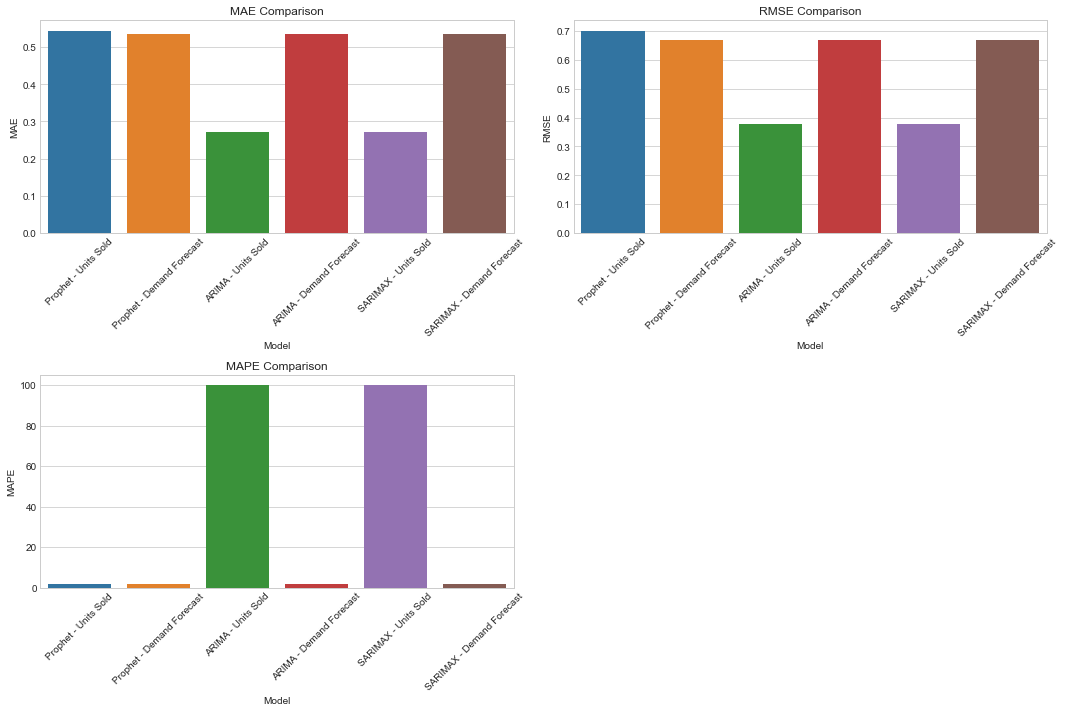

In [298]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="MAE", data=comparison_df)
plt.xticks(rotation=45)
plt.title("MAE Comparison")

plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="RMSE", data=comparison_df)
plt.xticks(rotation=45)
plt.title("RMSE Comparison")

plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="MAPE", data=comparison_df)
plt.xticks(rotation=45)
plt.title("MAPE Comparison")

plt.tight_layout()
plt.show()

# Save Model

In [287]:
import joblib

joblib.dump(bilstm_cnn_model, 'best_units_sold_model.pkl')

['best_units_sold_model.pkl']

In [288]:
joblib.dump(mlp_model, 'best_demand_forecast_model.pkl')

['best_demand_forecast_model.pkl']

# End of the notebook. The models have been saved and are ready 